# System setup

In [30]:
pwd

'/global/scratch/projects/fc_mvslab/data/sequencing/sog1_margot/sog_lib2/spikes'

In [1]:
!pip install /global/home/users/empchase/packages/labtools

Defaulting to user installation because normal site-packages is not writeable
Processing /global/home/users/empchase/packages/labtools
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for labtools: filename=labtools-0.1.9-py3-none-any.whl size=13659 sha256=a308aff7fa3e3ea3ed4f68208f1da80bd25dfeaeadb378c3670f1fda2c8e0964
  Stored in directory: /tmp/pip-ephem-wheel-cache-a6gehn3l/wheels/0a/df/62/1691745f59ae917022ddb5ab029803b2e8485e3dc6433ce7a0
Successfully built labtools
  Attempting uninstall: labtools
    Found existing installation: labtools 0.1.9
    Uninstalling labtools-0.1.9:
      Successfully uninstalled labtools-0.1.9


In [1]:
# import sys
# sys.path.append('/global/home/users/empchase/packages/labtools' +'/src')
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from labtools.adtools.sort import Sort
from labtools.adtools.counter import seq_counter
from labtools.adtools.finder import pull_AD
from labtools.adtools.seqlib import get_numreads
from labtools.adtools.counter import create_map, convert_bcs_from_map
from labtools.adtools.seqlib import write_bc_dict
from matplotlib import lines as mlines
import numpy as np
from Bio.Seq import Seq 

# Map files diagnostics --> are the two maps that Jordan made identical?

In [6]:
fpath = '/global/scratch/projects/fc_mvslab/data/sequencing/sog1_margot/sog_lib2/spikes/data'
files = [f'{fpath}/Staller_ML2_100ng_AM-F0003_TGGACTCGAA_TTCCGTATTG_S289.fastq.gz.assembled.fastq',
        f"{fpath}/Staller_ML2_50ng_AM-F0002_CGTCGCTAAG_AATACCAGGA_S288.fastq.gz.assembled.fastq"]

In [7]:
sum = 0
for file in files:
    num = get_numreads(file)
    sum += num
    print(num, sum)

825586 825586
600679 1426265


## Some testing Jordan was doing

In [7]:
# ng100 = seq_counter("data/Staller_ML2_100ng_AM-F0003_TGGACTCGAA_TTCCGTATTG_S289.fastq.gz.assembled.fastq", design_to_use='Sog1_lib2_dna.txt')
# ng50 = seq_counter("data/Staller_ML2_50ng_AM-F0002_CGTCGCTAAG_AATACCAGGA_S288.fastq.gz.assembled.fastq", design_to_use='Sog1_lib2_dna.txt')

Opening file Staller_ML2_100ng_AM-F0003_TGGACTCGAA_TTCCGTATTG_S289.fastq.gz.assembled.fastq ...
Total parsed reads = 825,586                      
Opening file Staller_ML2_50ng_AM-F0002_CGTCGCTAAG_AATACCAGGA_S288.fastq.gz.assembled.fastq ...
Total parsed reads = 600,679                      


In [8]:
# ads = seq_counter(files, design_to_use="Sog1_lib2_dna.txt")

Opening file Staller_ML2_100ng_AM-F0003_TGGACTCGAA_TTCCGTATTG_S289.fastq.gz.assembled.fastq ...
Total parsed reads = 825,586                      
Opening file Staller_ML2_50ng_AM-F0002_CGTCGCTAAG_AATACCAGGA_S288.fastq.gz.assembled.fastq ...
Total parsed reads = 600,679                      


In [9]:
# # percent of reads with a perfect AD
# ads.sum()/1426265

0.8331144633009995

In [10]:
# ng100 = pd.DataFrame(ng100, columns = ['100ng'])

In [11]:
# ng50 = pd.DataFrame(ng50, columns = ['50ng'])

In [12]:
# from functools import reduce

# data_frames = [ng50, ng100]

# renamed = []

# for df in data_frames:
#     cols = df.columns
#     name = df.index.name
#     if name == None:
#         name = 'index'
#     renamed.append(df.reset_index().rename(columns = {f'{name}':"ArrayDNA"})[["ArrayDNA", cols[-1]]])

# reads = reduce(lambda  left,right: pd.merge(left,right,on=['ArrayDNA'], how='outer'), renamed)

In [11]:
#reads.to_csv('sog1_lib2_spikein.csv', index = False)

In [13]:
# reads

ArrayDNA  50ng  100ng
0      AAATGTCAACATGTTATTGATAATTCTGATGTTGTTGATGATTGGC...  63.0   85.0
1      ATGGCTGGTAGATCTTGGTTGATTGATGCTAATAGAATTGCTGCTA...  67.0  125.0
2      ATGGAAGAACCACAAGCTGATCCAGCTGTTGAACCACCATTGGCTC...  75.0  103.0
3      GACTTTAAGAGAGATTTGGAAGAATGTCAGAAGATTGTCTTGGATC...  38.0   33.0
4      TTGGAACATGGTTTGGCTAATGGTGCTAAAGCTATGTTGGCTGCTA...  70.0  152.0
...                                                  ...   ...    ...
11342  TTGAGAATGAATTATATTAAAGAATTGGATAGAATTATTGCTTGTA...   3.0    2.0
11343  CAATATATTTATAATTCTCAACAATATGTTGAAGCTTATTCTTATT...   1.0    4.0
11344  GGTGGTGGTGGTGGTGGTGGTGGTGGTGGTGGTGGTTTGGATTTGG...   1.0    1.0
11345  GGTGGTTATGATTATGATTATGATTATGATTATGATTATGATTATG...   NaN    1.0
11346  GGTCCAGGTGCTGGTTCTCCATCTGCTGCTGCTTCTTCTTCTTGGC...   NaN    3.0

[11347 rows x 3 columns]

In [6]:
# fig = plt.figure(1, dpi = 300, figsize=(3,3))
# sns.histplot(reads)

## barcode map

In [8]:
barcodes, *otherthings = seq_counter(files, design_to_use='Sog1_lib2_dna.txt', barcoded = True, bc_anteceder = "GGCGCGCC")

Opening file Staller_ML2_100ng_AM-F0003_TGGACTCGAA_TTCCGTATTG_S289.fastq.gz.assembled.fastq ...
Total parsed reads = 825,586                      
Opening file Staller_ML2_50ng_AM-F0002_CGTCGCTAAG_AATACCAGGA_S288.fastq.gz.assembled.fastq ...
Total parsed reads = 600,679                      


In [14]:
type(barcodes)

pandas.core.series.Series

In [29]:
barcodes.sum()/1426265 #used to be 0.828 ... why did it go up?

0.8331144633009995

In [9]:
# barcodes.sum()/1426265

0.8285872541217796

In [20]:
bc_map_stuff = create_map(barcodes)

In [24]:
bc_map_stuff[1] # not sure what this number is?

69380

In [21]:
bc_map=bc_map_stuff[0]

In [25]:
len(bc_map) # different from Jordan's other csv file sog1_lib2_bc_map.csv () which has 557964 unique entries

500761

In [27]:
# write_bc_dict(bc_map, 'sog1_lib2_barcode_map_EC.csv') #probably the same as sog1_lib2_barcode_map_v2.csv but I've saved it as my own just in case

## more testing from Jordan

In [18]:
bcs = seq_counter(files, only_bcs = True)

Opening file Staller_ML2_100ng_AM-F0003_TGGACTCGAA_TTCCGTATTG_S289.fastq.gz.assembled.fastq ...
Total parsed reads = 825,586                      
Opening file Staller_ML2_50ng_AM-F0002_CGTCGCTAAG_AATACCAGGA_S288.fastq.gz.assembled.fastq ...
Total parsed reads = 600,679                      


In [19]:
bcs.head()

AGCACAGTTTC    13
GCCTACCCTCA     2
CGGAACCACAC     7
TGCACCAGATG     2
CCTCATATGCA     2
dtype: int64

In [25]:
bcs.sum()

1404889

In [26]:
bc_ads = convert_bcs_from_map(bcs, bc_map)

In [27]:
bc_ads.sum()

1294249

In [30]:
# percent of reads with a mappable barcode
1294249/1426265

0.9074393608480893

In [33]:
# percent reads with a locatable barcode
1404889/1426265

0.985012602847297

In [43]:
ads = seq_counter('../BYS4_reseq_2023/results/HJW5YDSX5_AACGGCCATC+TCGATTACCT_L003.fastq.gz.assembled.fastq', design_to_use='untransformed.txt')

Opening file HJW5YDSX5_AACGGCCATC+TCGATTACCT_L003.fastq.gz.assembled.fastq ...
Total parsed reads = 7,893,012                      


In [46]:
ads.sum()

19821.0

# Analyze FACS data (CZB_Jan2024/MYS3/feb7)
- analysis steps taken from Process_Sog_sort3.ipynb and E2FA & GCN4.ipynb on local (/Users/emilychase/Desktop/StallerLab/Sog1_lib2_analysis/from_jordan) but recapitulated as /global/scratch/projects/fc_mvslab/data/sequencing/CZB_Feb2024/Sog1_Lib2_map/map_outputs/Sort_analysis_v1.ipynb here on savio

In [9]:
mys3path = '/global/scratch/projects/fc_mvslab/data/sequencing/CZB_Jan2024/MYS3/feb7/'
gdnamappath = '/global/scratch/projects/fc_mvslab/data/sequencing/CZB_Feb2024/Sog1_Lib2_map/map_outputs/'
mapfpath = 'sog1_lib2_barcode_map_EC.csv'

## Process the sort
processed data saved as csv files testgfp[1,2]\_*\_.csv

In [33]:
# adapt jordan's code to match above format?

# USE READ 1 NOT ASSEMBLED

datanames_gfp8 = ["MYS3_001_S1_R1_001.fastq",
                 "MYS3_002_S2_R1_001.fastq",
                 'MYS3_003_S3_R1_001.fastq',
                 'MYS3_004_S4_R1_001.fastq',
                 'MYS3_005_S5_R1_001.fastq',
                 'MYS3_006_S6_R1_001.fastq',
                 'MYS3_007_S7_R1_001.fastq',
                 'MYS3_008_S8_R1_001.fastq']
datafiles_gfp8 = []
for f in datanames_gfp8:
    fpath = mys3path + f
    datafiles_gfp8.append(fpath)

# print(datafiles_gfp8)
bin_counts = [100,100,100,100,100,100,100,100]
bin_values_gfp8 = [146,237,331,483,776,1364,2592,6357]
gfp8wayfiles = Sort(datafiles_gfp8, bin_counts, bin_values_gfp8, bc_dict = mapfpath) #previously, JS used sog1_combined_barcodes.csv as bc_dict

In [34]:
gfp1_activity, gfp1_reads, gfp1_bins, gfp1_loss_table = gfp8wayfiles.process(bc_anteceder = "GGCGCGCC")

Opening file MYS3_001_S1_R1_001.fastq ...
Total parsed reads = 119,788,454                      
Opening file MYS3_002_S2_R1_001.fastq ...
Total parsed reads = 116,842,528                      
Opening file MYS3_003_S3_R1_001.fastq ...
Total parsed reads = 135,400,512                      
Opening file MYS3_004_S4_R1_001.fastq ...
Total parsed reads = 139,455,679                      
Opening file MYS3_005_S5_R1_001.fastq ...
Total parsed reads = 121,908,963                      
Opening file MYS3_006_S6_R1_001.fastq ...
Total parsed reads = 150,376,570                      
Opening file MYS3_007_S7_R1_001.fastq ...
Total parsed reads = 140,260,726                      
Opening file MYS3_008_S8_R1_001.fastq ...
Total parsed reads = 128,817,384                      


In [35]:
#save to txt files
#activity
gfp1_activity.to_csv('testgfp1_activity_EC.csv')
# loss table
with open("testgfp1_losstable_EC.txt", 'w') as f:  
    for key, value in gfp1_loss_table.items():  
        f.write('%s:%s\n' % (key, value))
#reads
gfp1_reads.to_csv('testgfp1_readsseries_EC.csv')
#bins
gfp1_bins.to_csv('testgfp1_bins_EC.csv')

In [37]:
datanames_gfp8_2 = ["MYS3_013_S13_R1_001.fastq",
                 "MYS3_014_S14_R1_001.fastq",
                 'MYS3_015_S15_R1_001.fastq',
                 'MYS3_016_S16_R1_001.fastq',
                 'MYS3_017_S17_R1_001.fastq',
                 'MYS3_018_S18_R1_001.fastq',
                 'MYS3_019_S19_R1_001.fastq',
                 'MYS3_020_S20_R1_001.fastq']
datafiles_gfp8_2 = []
for f in datanames_gfp8_2:
    fpath = mys3path + f
    datafiles_gfp8_2.append(fpath)

# print(datafiles_gfp8)
bin_counts = [100,100,100,100,100,100,100,100]
bin_values_gfp8 = [146,237,331,483,776,1364,2592,6357]
gfp8wayfiles_2 = Sort(datafiles_gfp8_2, bin_counts, bin_values_gfp8, bc_dict = mapfpath) #previously, JS used sog1_combined_barcodes.csv as bc_dict

In [38]:
gfp2_activity, gfp2_reads, gfp2_bins, gfp2_loss_table = gfp8wayfiles_2.process(bc_anteceder = "GGCGCGCC")

Opening file MYS3_013_S13_R1_001.fastq ...
Total parsed reads = 128,184,144                      
Opening file MYS3_014_S14_R1_001.fastq ...
Total parsed reads = 131,229,614                      
Opening file MYS3_015_S15_R1_001.fastq ...
Total parsed reads = 109,736,574                      
Opening file MYS3_016_S16_R1_001.fastq ...
Total parsed reads = 126,243,880                      
Opening file MYS3_017_S17_R1_001.fastq ...
Total parsed reads = 142,348,607                      
Opening file MYS3_018_S18_R1_001.fastq ...
Total parsed reads = 150,896,403                      
Opening file MYS3_019_S19_R1_001.fastq ...
Total parsed reads = 145,064,102                      
Opening file MYS3_020_S20_R1_001.fastq ...
Total parsed reads = 115,906,436                      


In [39]:
#save to txt files
#activity
gfp2_activity.to_csv('testgfp2_activity_EC.csv')
# loss table
with open("testgfp2_losstable_EC.txt", 'w') as f:  
    for key, value in gfp2_loss_table.items():  
        f.write('%s:%s\n' % (key, value))
#reads
gfp2_reads.to_csv('testgfp2_readsseries_EC.csv')
#bins
gfp2_bins.to_csv('testgfp2_bins_EC.csv')

## Analyze sort quality

In [19]:
# start from here aug 22
gfp1_activity = pd.read_csv('testgfp1_activity_EC.csv', index_col='AD')
gfp1_reads = pd.read_csv('testgfp1_readsseries_EC.csv', index_col='AD').squeeze()
# gfp1_reads = gfp1_reads.squeeze()
gfp1_bins = pd.read_csv('testgfp1_bins_EC.csv', index_col='AD')

gfp2_activity = pd.read_csv('testgfp2_activity_EC.csv', index_col='AD')
gfp2_reads = pd.read_csv('testgfp2_readsseries_EC.csv', index_col='AD').squeeze()
gfp2_bins = pd.read_csv('testgfp2_bins_EC.csv', index_col='AD')

In [20]:
# merge read counts
d = pd.DataFrame(gfp1_reads).merge(pd.DataFrame(gfp2_reads), on = "AD", how = 'outer').reset_index().rename(columns= {"AD":"ArrayDNA","0_x":"reads_S3_1","0_y":"reads_S3_2"})
d.head()

ArrayDNA  reads_S3_1  reads_S3_2
0  AAACAAAGACAGAATCAGAATCAAGGTCAACAACAACCAACTTGGT...       610.0       643.0
1  AAACAAAGAGATAATGAAGATAATGGTGAAGAAGATCCAACTTGGT...     44354.0     36001.0
2  AAACAAAGATCTATTCCATTGTCTCCAATTGTTCCAGAATCTTCTG...        68.0        38.0
3  AAACAAATTGATATTTATAAATATGATCCATGGGATTTGCCAAGAG...      5090.0      7330.0
4  AAACAAATTGTCTTGGATCCATCTAATATTGAATTGGATACTCCAC...       172.0       137.0

In [21]:
# # imported Sog1_all_activities_and_tiles_EC_unpublisheddatadownload.csv from local after downloading from drive (originally Sog1_all_activities_and_tiles.csv)
# old_tiles = pd.read_csv("Sog1_all_activities_and_tiles_EC_unpublisheddatadownload.csv", usecols=['Activity_GFP8', 'ArrayDNA_y'])
# old_tiles = old_tiles.rename(columns={'ArrayDNA_y':'ArrayDNA'})

In [22]:
to_merge = gfp1_activity.reset_index(names = "ArrayDNA")[["ArrayDNA", "Activity"]].rename(columns = {'Activity':"Activity_S3_1"})
# n = old_tiles.merge(to_merge, on = "ArrayDNA", how = 'outer')
to_merge2 = gfp2_activity.reset_index(names = "ArrayDNA")[["ArrayDNA", "Activity"]].rename(columns = {'Activity':"Activity_S3_2"})
# c = n.merge(to_merge2, on = "ArrayDNA", how = 'outer').merge(d, on = "ArrayDNA", how = 'outer')
c = to_merge.merge(to_merge2, on = "ArrayDNA", how = 'outer').merge(d, on = "ArrayDNA", how = 'outer')

In [23]:
c.head()

ArrayDNA  Activity_S3_1  \
0  AAACAAAGACAGAATCAGAATCAAGGTCAACAACAACCAACTTGGT...    1079.074274   
1  AAACAAAGAGATAATGAAGATAATGGTGAAGAAGATCCAACTTGGT...    1394.076068   
2  AAACAAAGATCTATTCCATTGTCTCCAATTGTTCCAGAATCTTCTG...    1371.861742   
3  AAACAAATTGATATTTATAAATATGATCCATGGGATTTGCCAAGAG...     283.663233   
4  AAACAAATTGTCTTGGATCCATCTAATATTGAATTGGATACTCCAC...    4076.691936   

   Activity_S3_2  reads_S3_1  reads_S3_2  
0     925.703811       610.0       643.0  
1    1424.548173     44354.0     36001.0  
2    1170.193129        68.0        38.0  
3     267.611412      5090.0      7330.0  
4    3163.539743       172.0       137.0

In [24]:
ex = c[["ArrayDNA", "Activity_S3_1", "Activity_S3_2", "reads_S3_1", "reads_S3_2"]].copy(deep = True)
ex['AAseq'] = [str(Seq(x).translate()) for x in ex.ArrayDNA]
ex["lib2_avg"] = ex[['Activity_S3_1', 'Activity_S3_2']].mean(axis = 1)
ex["lib2_std"] = ex[['Activity_S3_1', 'Activity_S3_2']].std(axis = 1)

In [25]:
# save tile/AAseq, activities, read counts, and their avg/std stats into a csv
# ex.to_csv("Sog1_library2_activities_with_reads_ECspike.csv", index = None)

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


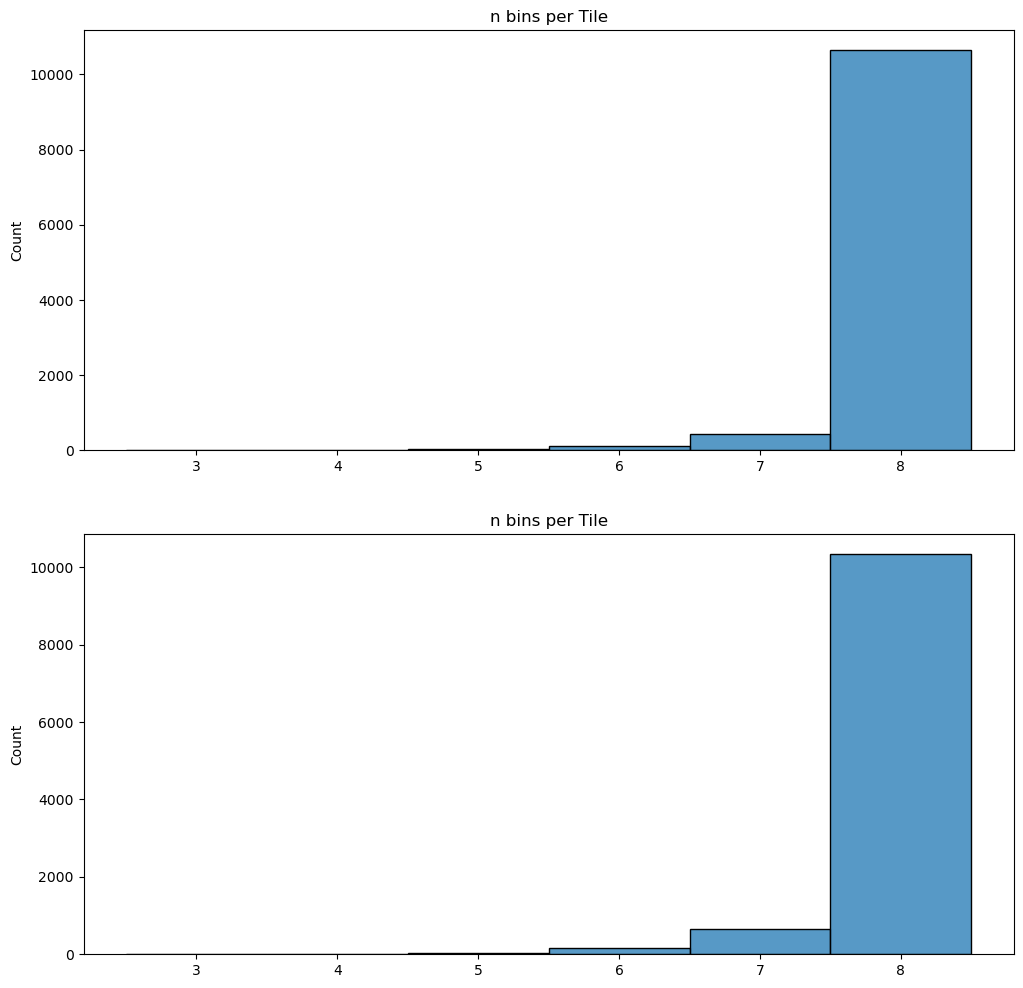

In [26]:
fix, axes = plt.subplots(2,1, figsize = (12,12))
for file, ax in zip([gfp1_bins,gfp2_bins], [axes[0],axes[1]]):
    df = file
    df['n_bins'] = df[df > 0].iloc[:,:-2].count(axis = 1)
    df["n_reads"] = df.sum(axis = 1)
    sns.histplot(df[df > 0].iloc[:,:-2].count(axis = 1), bins = 8, discrete = True,ax = ax)
    ax.set_title(f'n bins per Tile')

<Axes: xlabel='n_bins', ylabel='n_reads'>

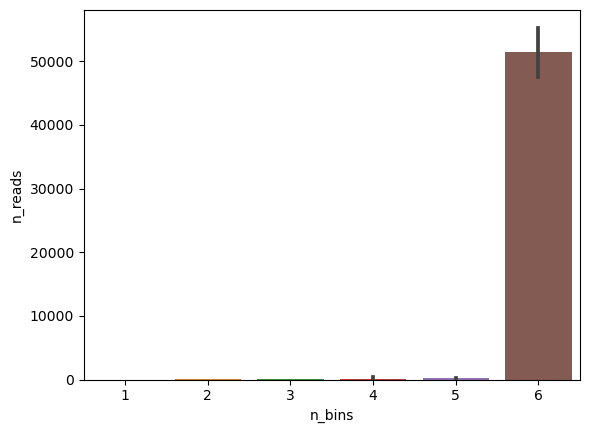

In [27]:
sns.barplot(data = gfp1_bins, x = "n_bins", y = "n_reads")

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='n_reads', ylabel='Count'>

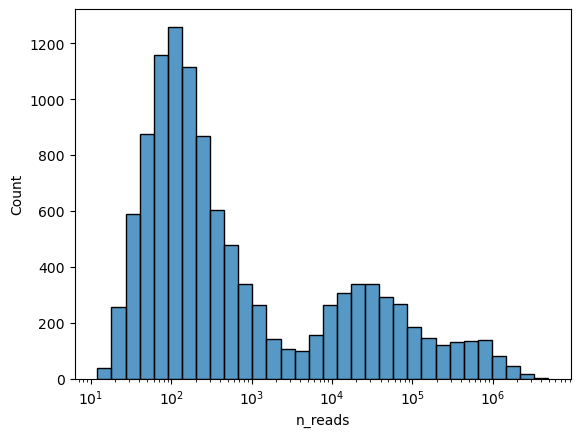

In [28]:
sns.histplot(gfp2_bins.n_reads, log_scale=True)

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from scipy.stats import spearmanr

# colors 
orange = (1.0, 0.41, 0.12)
alt_orange = (0.6, 0.21, 0.02)
burgundy = (0.6, 0.15, 0.15)
purple = (0.3, 0.16, 0.61)
teal = (0.26, 0.72, 0.73)
alt_teal = (0.16, 0.4, 0.4)
navy = (0.11, 0.16, 0.27)
gray = (0.49, 0.49, 0.49)
pink = (1.0, 0.08, 0.58)  # Define pink color

lin = LinearRegression()

def compare(X, Y, scores, color = navy, titles = None, x = 100, y = 15000, gridsize = 60, opt = '', line = True, title = None):
    plt.figure(1, dpi = 400)

    """
    X & Y: columns in a df
    scores: df with the columns you want to compare
    """
    
    scores = scores[[X,Y]].dropna(how='any')
    
    lin.fit(scores[[X]], scores[[Y]])
    sns.jointplot(data = scores, x = X, y = Y, color = color, kind = 'scatter')
    
    # Add the regression line if line=True
    if line:
        sns.regplot(data = scores, x = X, y = Y, scatter= False, ci = None, line_kws = {'color':navy, 'alpha':0.9}, truncate = True)
    
    # Add the y=x line in pink
    min_val = min(scores[[X, Y]].min())  # Find the minimum value for both X and Y
    max_val = max(scores[[X, Y]].max())  # Find the maximum value for both X and Y
    plt.plot([min_val, max_val], [min_val, max_val], color=pink, linestyle='--', label='y=x')

    cod = round(lin.score(scores[[X]], scores[[Y]]), 3)
    spearman = round(spearmanr(scores[[X]],scores[[Y]])[0], 3)
    
    if titles is not None:
        X = titles[0]
        Y = titles[1]
        plt.xlabel(titles[0])
        plt.ylabel(titles[1])
    
    plt.title(title, fontsize = 14, y = -0.17)
    plt.text(x,y, f"R^2 = {cod} \nSpearman: {spearman}\nNum shared tiles: {len(scores)}", fontsize = 12, bbox= {'color':'white','alpha':0.7})
    # plt.legend()
    plt.tight_layout()
    
    if opt != '':
        plt.suptitle(opt, color='red', va='bottom')
    
    opt = opt+'_'
    # plt.savefig(f"./figures/{Y.replace(' ','_')}_v_{X.replace(' ','_')}{opt.replace(' ','_')}sog1_lib2_EC.svg")


In [16]:
# compare("Activity_S3_1", "Activity_GFP8", y = 8000, titles = ["Activity Sog1 Library 2, Sort 3", "Activity Margot Library 1"], 
#        title = "Library 1 tiles measured in both sorts")

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 2560x1920 with 0 Axes>

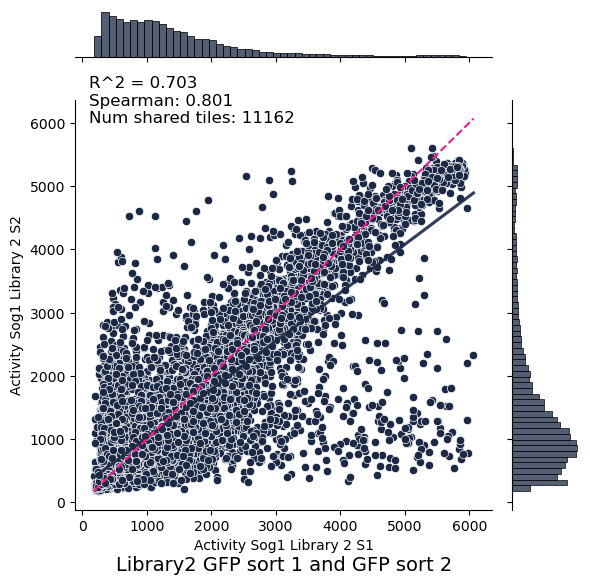

In [33]:
compare("Activity_S3_1", "Activity_S3_2", c, y = 6000, titles = ["Activity Sog1 Library 2 S1", "Activity Sog1 Library 2 S2"], 
       title = "Library2 GFP sort 1 and GFP sort 2")

In [18]:
reads = pd.DataFrame([gfp1_reads, gfp2_reads])
reads.index=[0,1]
reads = reads.transpose()
reads.median()

0    362.0
1    223.0
dtype: float64

In [19]:
reads.head()

0        1
AD                                                                  
AAACAAAGACAGAATCAGAATCAAGGTCAACAACAACCAACTTGGTT...    610.0    643.0
AAACAAAGAGATAATGAAGATAATGGTGAAGAAGATCCAACTTGGTT...  44354.0  36001.0
AAACAAAGATCTATTCCATTGTCTCCAATTGTTCCAGAATCTTCTGA...     68.0     38.0
AAACAAATTGATATTTATAAATATGATCCATGGGATTTGCCAAGAGT...   5090.0   7330.0
AAACAAATTGTCTTGGATCCATCTAATATTGAATTGGATACTCCACC...    172.0    137.0

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to 

Text(300000, 2000, 'Mean:\n0    49286.312317\n1    53560.606115\n\nMedian:\n0    362.0\n1    223.0\n\nMax:\n0    3858390.0\n1    4881825.0\n\nStandard Deviation:\n0    202464.273442\n1    225336.443621')

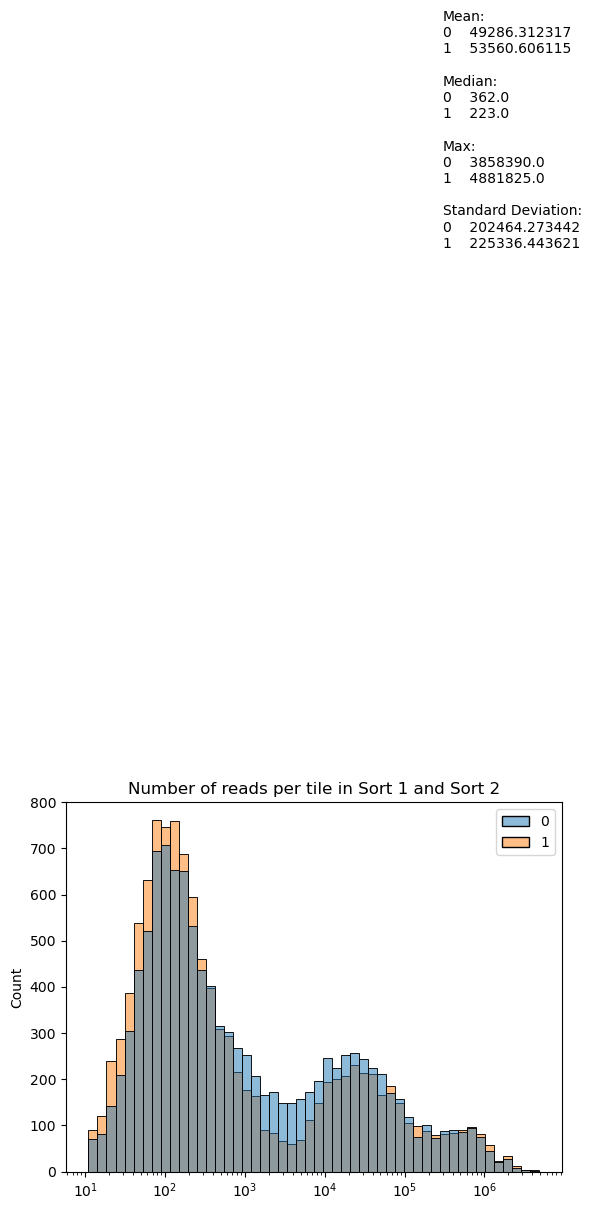

In [20]:
sns.histplot(reads, bins = 50, log_scale=True)
plt.title("Number of reads per tile in Sort 1 and Sort 2")
plt.text(300000,2000, f"Mean:\n{reads.mean().to_string()}\n\nMedian:\n{reads.median().to_string()}\n\nMax:\n{reads.max().to_string()}\n\nStandard Deviation:\n{reads.std().to_string()}")
# plt.savefig("figures/sog1_lib2_reads.svg")

## Find Gcn4 tile activities

In [10]:
fromjordan = '/global/scratch/projects/fc_mvslab/data/sequencing/CZB_Feb2024/Sog1_Lib2_map/map_outputs/from_jordan/'

activities = pd.read_csv("Sog1_library2_activities_with_reads_ECspike.csv") # this csv file came from "Analyze sort quality" - made up of sort data from '/global/scratch/projects/fc_mvslab/data/sequencing/CZB_Jan2024/MYS3/feb7/'
# e2fa_tiles = pd.read_csv("from_jordan/e2fa_tiles.csv", sep = ";")
gcn4_tiles = pd.read_csv(f"{fromjordan}GCN4_phosphovariants_max_lists.csv", sep = ";")

In [11]:
activities.head()

ArrayDNA  Activity_S3_1  \
0  AAACAAAGACAGAATCAGAATCAAGGTCAACAACAACCAACTTGGT...    1079.074274   
1  AAACAAAGAGATAATGAAGATAATGGTGAAGAAGATCCAACTTGGT...    1394.076068   
2  AAACAAAGATCTATTCCATTGTCTCCAATTGTTCCAGAATCTTCTG...    1371.861742   
3  AAACAAATTGATATTTATAAATATGATCCATGGGATTTGCCAAGAG...     283.663233   
4  AAACAAATTGTCTTGGATCCATCTAATATTGAATTGGATACTCCAC...    4076.691936   

   Activity_S3_2  reads_S3_1  reads_S3_2  \
0     925.703811       610.0       643.0   
1    1424.548173     44354.0     36001.0   
2    1170.193129        68.0        38.0   
3     267.611412      5090.0      7330.0   
4    3163.539743       172.0       137.0   

                                      AAseq     lib2_avg    lib2_std  
0  KQRQNQNQGQQQPTWFQSGSQFILNSQQLVQALSLCQQLL  1002.389042  108.449295  
1  KQRDNEDNGEEDPTWFDSGSQFILNSQQLVEALSLCDDLL  1409.312120   21.547032  
2  KQRSIPLSPIVPESSDPAALKRARNTEAARRSRARKLQRM  1271.027436  142.601244  
3  KQIDIYKYDPWDLPRVSSVGEKEWYFFCMRGRKYRNSVRP   275.637323   11.350351  
4  KQIVLDPSNIELDTPPEFRLSQLEFGSQDSFLAWGTGKTD  3620.115839  645.696108

In [12]:
# e2fa_tiles['AAseq'] = [x.upper() for x in e2fa_tiles.tile]
gcn4_tiles['AAseq'] = [x.upper() for x in gcn4_tiles.tile]

In [14]:
maptiles = pd.read_csv('sog1_lib2_barcode_map_EC.csv', header=None).T #spikein-generated map
maptiles = maptiles.rename(columns={0:'BC', 1:'ArrayDNA'})
maptiles['AAseq'] = [str(Seq(x).translate()) for x in maptiles.ArrayDNA]
maptiles_grouped = maptiles.groupby('AAseq').first().reset_index()

merged_df = pd.merge(gcn4_tiles, maptiles_grouped, on='AAseq', how='left')
merged_df.head()

/tmp/ipykernel_890393/1414523165.py:1: DtypeWarning: Columns (500102) have mixed types. Specify dtype option on import or set low_memory=False.
  maptiles = pd.read_csv('sog1_lib2_barcode_map_EC.csv', header=None).T


ortholog_tile_name                                      tile  \
0        GCN4_CAAD40  STDSTPMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK   
1        GCN4_CAAD40  STDSdpMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK   
2        GCN4_CAAD40  STDSapMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK   
3         War1_Cterm  PSPSSSVDNLNDYLTDINSLAWGVNSLNDEFWTDLFMNDI   
4         War1_Cterm  PdpSSSVDNLNDYLTDINSLAWGVNSLNDEFWTDLFMNDI   

           subgroup                                     AAseq           BC  \
0  WT_GCN4_ortholog  STDSTPMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK  GTCAGACAGGC   
1         full_pmim  STDSDPMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK  CACTTCAGCTA   
2         full_pmut  STDSAPMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK  CCTTCAAGTCG   
3  WT_GCN4_ortholog  PSPSSSVDNLNDYLTDINSLAWGVNSLNDEFWTDLFMNDI  CAATCCCTCGT   
4         full_pmim  PDPSSSVDNLNDYLTDINSLAWGVNSLNDEFWTDLFMNDI  TGGATCACCCT   

                                            ArrayDNA  
0  TCTACTGATTCTACTCCAATGTTTGAATATGAGAATTTGGAAGATA...  
1  TCTACTGATTCTGATCCAATGTTTGAATATGAGAATTTGGAAGATA...  
2  TCTACTGATTCTGCTCCAATGTTTGAATATGAGAATTTGGAAGATA...  
3  CCATCTCCATCTTCTTCTGTTGATAATTTGAATGATTATTTGACTG...  
4  CCAGATCCATCTTCTTCTGTTGATAATTTGAATGATTATTTGACTG...

In [15]:
maptiles.shape

(500761, 3)

In [16]:
merged_df['PresentinMap'] = np.where(merged_df['ArrayDNA'].notna(), 1, 0)
# merged_df.head()

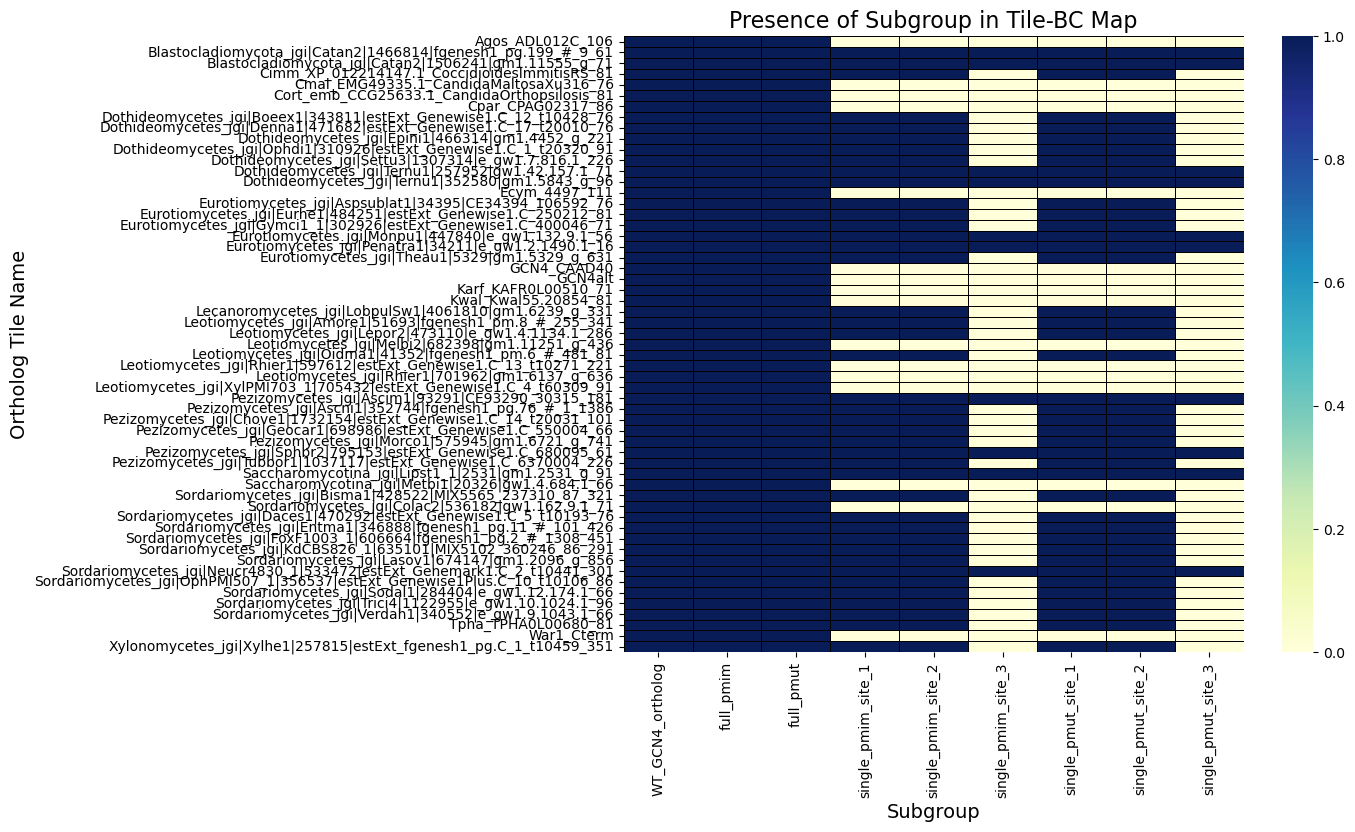

In [17]:
# Pivot the data to prepare it for a heatmap

heatmap_data = merged_df.pivot_table(index='ortholog_tile_name', 
                                     columns='subgroup', values='PresentinMap', 
                                     fill_value=0, )
                                    

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', 
            linewidths=0.5, linecolor='black', 
             cbar=True,
           xticklabels=True, yticklabels=True)

# Titles and labels
plt.title('Presence of Subgroup in Tile-BC Map', fontsize=16)
plt.xlabel('Subgroup', fontsize=14)
plt.ylabel('Ortholog Tile Name', fontsize=14)

plt.show()

In [18]:
gcn4tilesinmap = merged_df[~merged_df['ArrayDNA'].isna()]

In [19]:
gcn4tilesinmap['subgroup'].value_counts().to_frame().reset_index()

subgroup  count
0    WT_GCN4_ortholog     60
1           full_pmim     60
2           full_pmut     60
3  single_pmim_site_1     43
4  single_pmut_site_1     43
5  single_pmim_site_2     43
6  single_pmut_site_2     43
7  single_pmim_site_3     11
8  single_pmut_site_3     11

In [20]:
gcn4_tiles['subgroup'].value_counts().to_frame().reset_index()

subgroup  count
0    WT_GCN4_ortholog     60
1           full_pmim     60
2           full_pmut     60
3  single_pmim_site_1     43
4  single_pmut_site_1     43
5  single_pmim_site_2     43
6  single_pmut_site_2     43
7  single_pmim_site_3     11
8  single_pmut_site_3     11

In [21]:
# e2fa = e2fa_tiles.merge(activities, how = 'inner', on = 'AAseq')
# e2fa = e2fa[['tf_name','start','end','AAseq','tile','subgroup','lib2_avg','Activity_S3_1','Activity_S3_2','reads_S3_1', 'reads_S3_2','lib2_std','ArrayDNA']]

gcn4 = gcn4_tiles.merge(activities, how = 'inner', on = 'AAseq') # this df is the activity data but just for gcn4
# gcn4 = merged_df.merge(activities, how = 'inner', on = 'AAseq')
gcn4 = gcn4[['ortholog_tile_name','AAseq','tile','subgroup','lib2_avg','Activity_S3_1','Activity_S3_2','reads_S3_1', 'reads_S3_2','lib2_std','ArrayDNA']]
# gcn4 = gcn4[['ortholog_tile_name','AAseq','tile','subgroup','lib2_avg','Activity_S3_1','Activity_S3_2','reads_S3_1', 'reads_S3_2','lib2_std','PresentinMap']]

gcn4[['ortholog_tile_name', "tile", "subgroup", "Activity_S3_1", "Activity_S3_2",'reads_S3_1', 'reads_S3_2']][gcn4.ortholog_tile_name != "War1_Cterm"].iloc[0:6]

ortholog_tile_name                                      tile  \
0        GCN4_CAAD40  STDSTPMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK   
1        GCN4_CAAD40  STDSdpMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK   
2        GCN4_CAAD40  STDSapMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK   
6            GCN4alt  DDAVVESFFSSSTDSTPMFEYENLEDNSKEWTSLFDNDIP   
7            GCN4alt  DDAVVESFFSSSTDSdpMFEYENLEDNSKEWTSLFDNDIP   
8            GCN4alt  DDAVVESFFSSSTDSapMFEYENLEDNSKEWTSLFDNDIP   

           subgroup  Activity_S3_1  Activity_S3_2  reads_S3_1  reads_S3_2  
0  WT_GCN4_ortholog     975.339096     696.700377        23.0        25.0  
1         full_pmim     472.106028     424.199871    615630.0    744008.0  
2         full_pmut    3931.409814    4246.908563     41372.0     45165.0  
6  WT_GCN4_ortholog     389.471551     405.059168      1262.0      1508.0  
7         full_pmim    1633.022796     958.617105        81.0        64.0  
8         full_pmut     696.494336     737.696446        52.0        62.0

In [42]:
gcn4.shape

(372, 11)

In [33]:
# good_e2fa = e2fa[(e2fa.reads_S3_1 > 100) & (e2fa.reads_S3_2 > 100)]
# def getgroup(group,subgroup=None, tile=None, tile_id = False):
#     data = good_e2fa.where(good_e2fa.subgroup == group).dropna(how="all")
#     return data

In [22]:
# colors 
orange = (1.0, 0.41, 0.12)
alt_orange = (0.6, 0.21, 0.02)
#purple = (0.3, 0.16, 0.61)
purple = (0.44,0.37,0.85)
teal = (0.26, 0.72, 0.73)
alt_teal = (0.16, 0.4, 0.4)
navy = (0.11, 0.16, 0.27)
gray = (0.49, 0.49, 0.49)

# neg = red
#burgundy = (0.6, 0.15, 0.15)
burgundy = (0.50,0.00,0.33)

# pos = blue
alt_navy = (0.1, 0.2, 0.55)

In [93]:
# # Main phosphosite plot 

# sns.set_palette([purple])

# fig, axes = plt.subplots(1,1, figsize=(8, 6), dpi = 100)

# # add data 
# sns.lineplot(x='start', y='lib2_avg', data=getgroup("WT_e2fa"), linewidth = 4, color = purple)
# sns.lineplot(x='start', y='lib2_avg', data=getgroup("full_pmut"), linewidth=4, color = teal)
# sns.lineplot(x='start', y='lib2_avg', data=getgroup("full_pmim"), linewidth=3, color = burgundy)

# # add squares for legend markers
# rect1 = mlines.Line2D([], [], marker="s", markersize=25, linewidth=0, color=purple)
# rect2 = mlines.Line2D([], [], marker="s", markersize=25, linewidth=0, color=teal)
# rect3 = mlines.Line2D([], [], marker="s", markersize=25, linewidth=0, color=burgundy)

# # add top legend
# axes.legend(handles = [rect1, rect2, rect3], labels = ['Wild type', 'Phosphomutant', "Phosphomimetic"], fontsize = 15, ncol=3, 
#             bbox_to_anchor = [1.06,1.13], handlelength=0.5, frameon = False, handletextpad = 1.2)

# # titles and labels 
# axes.set_title(label="E2FA Full Phosphosite Tiles", y= 1.13, size = 20)
# axes.set_ylabel(ylabel="Activity", fontsize = 18, labelpad=10)
# axes.set_xlabel(xlabel="E2FA Position", fontsize = 18, labelpad=10)

# # tick formatting
# plt.tick_params(length = 10)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.ylim(0,6000)

# # margin adjustment
# plt.subplots_adjust(wspace=0, hspace=0.05)

# #plt.savefig("./figures/sort_2/WT_GFP_phosphosites.png")

In [23]:
def getgroup(group,subgroup=None, tile=None, tile_id = False):
    data = gcn4.where(gcn4.subgroup == group).dropna(how="all")
    return data


In [29]:
gcn4_orthos = gcn4[gcn4.subgroup.isin(['WT_GCN4_ortholog','full_pmim','full_pmut'])]
good_gcn4 = gcn4[(gcn4.reads_S3_1 > 100) & (gcn4.reads_S3_2 > 100)].head(50)
good_gcn4_all = gcn4[(gcn4.reads_S3_1 > 100) & (gcn4.reads_S3_2 > 100)] # may need to adjust this to threshold properly
# good_gcn4_all = gcn4[(gcn4.PresentinMap == 1) & (gcn4.reads_S3_1 > 50) & (gcn4.reads_S3_2 > 50)]

In [28]:
gcn4_orthos

ortholog_tile_name  \
0                                     GCN4_CAAD40   
1                                     GCN4_CAAD40   
2                                     GCN4_CAAD40   
3                                      War1_Cterm   
4                                      War1_Cterm   
..                                            ...   
363   Cort_emb_CCG25633.1_CandidaOrthopsilosis_81   
364   Cort_emb_CCG25633.1_CandidaOrthopsilosis_81   
365  Cimm_XP_012214147.1_CoccidioidesImmitisRS_81   
366  Cimm_XP_012214147.1_CoccidioidesImmitisRS_81   
367  Cimm_XP_012214147.1_CoccidioidesImmitisRS_81   

                                        AAseq  \
0    STDSTPMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK   
1    STDSDPMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK   
2    STDSAPMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK   
3    PSPSSSVDNLNDYLTDINSLAWGVNSLNDEFWTDLFMNDI   
4    PDPSSSVDNLNDYLTDINSLAWGVNSLNDEFWTDLFMNDI   
..                                        ...   
363  KDALLDHDPMFDELDFIMDGAKVNSKEDWVALFGGDGNGD   
364  KDALLDHAPMFDELDFIMDGAKVNSKEDWVALFGGDGNGD   
365  SFESPGYFSHDTSPLIATDSDLGPGHEEWESLFPVESAML   
366  SFEDPGYFSHDTDPLIATDSDLGPGHEEWESLFPVESAML   
367  SFEAPGYFSHDTAPLIATDSDLGPGHEEWESLFPVESAML   

                                         tile          subgroup     lib2_avg  \
0    STDSTPMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK  WT_GCN4_ortholog   836.019736   
1    STDSdpMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK         full_pmim   448.152950   
2    STDSapMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK         full_pmut  4089.159189   
3    PSPSSSVDNLNDYLTDINSLAWGVNSLNDEFWTDLFMNDI  WT_GCN4_ortholog  1528.155941   
4    PdpSSSVDNLNDYLTDINSLAWGVNSLNDEFWTDLFMNDI         full_pmim   973.120027   
..                                        ...               ...          ...   
363  KDALLDHdpMFDELDFIMDGAKVNSKEDWVALFGGDGNGD         full_pmim   616.484692   
364  KDALLDHapMFDELDFIMDGAKVNSKEDWVALFGGDGNGD         full_pmut  5491.348064   
365  SFESPGYFSHDTSPLIATDSDLGPGHEEWESLFPVESAML  WT_GCN4_ortholog  1048.825426   
366  SFEdpGYFSHDTdpLIATDSDLGPGHEEWESLFPVESAML         full_pmim  3615.131855   
367  SFEapGYFSHDTapLIATDSDLGPGHEEWESLFPVESAML         full_pmut  2691.868560   

     Activity_S3_1  Activity_S3_2  reads_S3_1  reads_S3_2    lib2_std  \
0       975.339096     696.700377        23.0        25.0  197.027327   
1       472.106028     424.199871    615630.0    744008.0   33.874769   
2      3931.409814    4246.908563     41372.0     45165.0  223.091305   
3      1837.446905    1218.864976        41.0        23.0  437.403477   
4      1280.358851     665.881202        84.0       113.0  434.501313   
..             ...            ...         ...         ...         ...   
363     679.386539     553.582845       344.0       370.0   88.956645   
364    5856.354554    5126.341573     29239.0     36472.0  516.197130   
365    1036.729715    1060.921137       151.0       150.0   17.105919   
366    3359.576438    3870.687272       908.0       671.0  361.409936   
367    2655.864472    2727.872648       250.0       296.0   50.917470   

                                              ArrayDNA  
0    TCTACTGATTCTACTCCAATGTTTGAATATGAGAATTTGGAAGATA...  
1    TCTACTGATTCTGATCCAATGTTTGAATATGAGAATTTGGAAGATA...  
2    TCTACTGATTCTGCTCCAATGTTTGAATATGAGAATTTGGAAGATA...  
3    CCATCTCCATCTTCTTCTGTTGATAATTTGAATGATTATTTGACTG...  
4    CCAGATCCATCTTCTTCTGTTGATAATTTGAATGATTATTTGACTG...  
..                                                 ...  
363  AAAGATGCTTTGTTGGATCATGATCCAATGTTTGATGAATTGGACT...  
364  AAAGATGCTTTGTTGGATCATGCTCCAATGTTTGATGAATTGGACT...  
365  TCATTTGAATCTCCAGGTTACTTCTCTCATGATACTTCTCCATTGA...  
366  TCATTTGAAGATCCAGGTTACTTCTCTCATGATACTGATCCATTGA...  
367  TCATTTGAAGCTCCAGGTTACTTCTCTCATGATACTGCTCCATTGA...  

[178 rows x 11 columns]

In [27]:
good_gcn4['ortholog_tile_name'].value_counts().to_frame().reset_index()

ortholog_tile_name  count
0  Dothideomycetes_jgi|Ternu1|257952|gw1.42.157.1_71     16
1   Pezizomycetes_jgi|Ascim1|93291|CE93290_30315_181      9
2  Blastocladiomycota_jgi|Catan2|1506241|gm1.1155...      9
3  Leotiomycetes_jgi|Amore1|51693|fgenesh1_pm.8_#...      6
4  Leotiomycetes_jgi|Rhier1|597612|estExt_Genewis...      4
5                                        GCN4_CAAD40      2
6  Pezizomycetes_jgi|Ascni1|352744|fgenesh1_pg.76...      2
7                                         War1_Cterm      1
8                                            GCN4alt      1

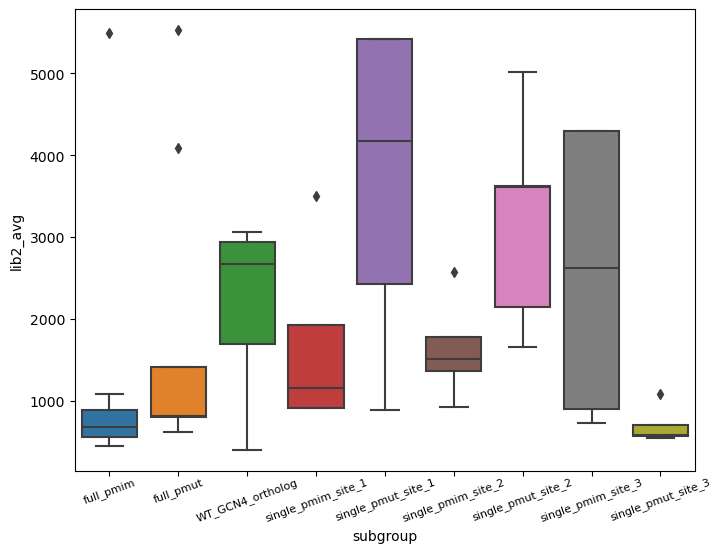

In [30]:
fig, axes = plt.subplots(1,1, figsize=(8, 6), dpi = 100)

sns.boxplot(x = 'subgroup', y = 'lib2_avg', data = good_gcn4)
axes.tick_params('x', labelsize = 8, bottom = True, labelrotation = 20, pad = 0)

(70.15641191626355, 6000.0)

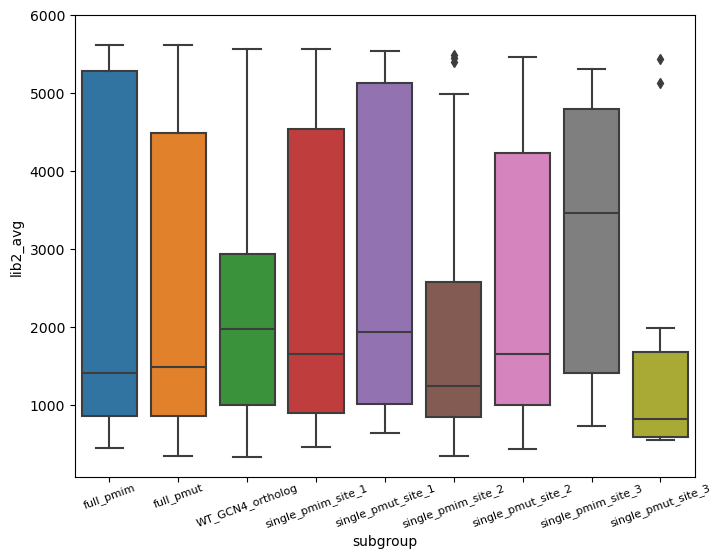

In [31]:
fig, axes = plt.subplots(1,1, figsize=(8, 6), dpi = 100)

sns.boxplot(x = 'subgroup', y = 'lib2_avg', data = good_gcn4_all)
axes.tick_params('x', labelsize = 8, bottom = True, labelrotation = 20, pad = 0)
axes.set_ylim(top=6000)

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_d

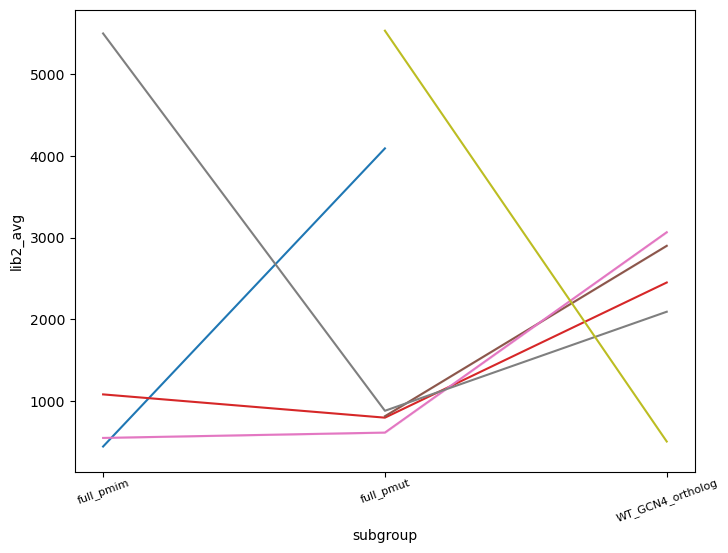

In [99]:
# top 50? Group of 50?
fig, axes = plt.subplots(1,1, figsize=(8, 6), dpi = 100)

sns.lineplot(x = 'subgroup', y = 'lib2_avg',hue = 'ortholog_tile_name', data = good_gcn4[good_gcn4.subgroup.isin(['WT_GCN4_ortholog','full_pmim','full_pmut'])], legend = False)
axes.tick_params('x', labelsize = 8, bottom = True, labelrotation = 20, pad = 0)

In [33]:
good_gcn4_all.head()

ortholog_tile_name  \
1                                        GCN4_CAAD40   
2                                        GCN4_CAAD40   
5                                         War1_Cterm   
6                                            GCN4alt   
9  Blastocladiomycota_jgi|Catan2|1506241|gm1.1155...   

                                      AAseq  \
1  STDSDPMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK   
2  STDSAPMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK   
5  PAPSSSVDNLNDYLTDINSLAWGVNSLNDEFWTDLFMNDI   
6  DDAVVESFFSSSTDSTPMFEYENLEDNSKEWTSLFDNDIP   
9  SSPPPASIATPSPPLAAAQHVPAADGQWLALFPHPSSIDF   

                                       tile          subgroup     lib2_avg  \
1  STDSdpMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK         full_pmim   448.152950   
2  STDSapMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK         full_pmut  4089.159189   
5  PapSSSVDNLNDYLTDINSLAWGVNSLNDEFWTDLFMNDI         full_pmut  1416.693992   
6  DDAVVESFFSSSTDSTPMFEYENLEDNSKEWTSLFDNDIP  WT_GCN4_ortholog   397.265360   
9  SSPPPASIATPSPPLAAAQHVPAADGQWLALFPHPSSIDF  WT_GCN4_ortholog  2451.305221   

   Activity_S3_1  Activity_S3_2  reads_S3_1  reads_S3_2    lib2_std  \
1     472.106028     424.199871    615630.0    744008.0   33.874769   
2    3931.409814    4246.908563     41372.0     45165.0  223.091305   
5    1456.330732    1377.057252     33978.0     35679.0   56.054815   
6     389.471551     405.059168      1262.0      1508.0   11.022110   
9    2658.644500    2243.965942      6992.0      7290.0  293.222020   

                                            ArrayDNA  
1  TCTACTGATTCTGATCCAATGTTTGAATATGAGAATTTGGAAGATA...  
2  TCTACTGATTCTGCTCCAATGTTTGAATATGAGAATTTGGAAGATA...  
5  CCAGCTCCATCTTCTTCTGTTGATAATTTGAATGATTATTTGACTG...  
6  GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...  
9  TCTTCTCCACCACCAGCTTCTATTGCTACTCCATCTCCACCATTGG...

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_d

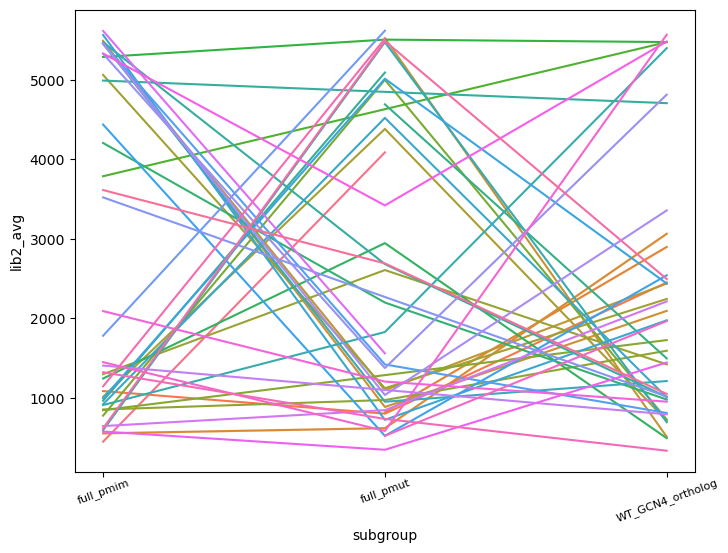

In [101]:
# all best
fig, axes = plt.subplots(1,1, figsize=(8, 6), dpi = 100)

sns.lineplot(x = 'subgroup', y = 'lib2_avg',hue = 'ortholog_tile_name', data = good_gcn4_all[good_gcn4_all.subgroup.isin(['WT_GCN4_ortholog','full_pmim','full_pmut'])], legend = False)
axes.tick_params('x', labelsize = 8, bottom = True, labelrotation = 20, pad = 0)

# Further analysis - suggestions from max August 21

## Compare analyzed sorts (deep gDNA map vs shallow plasmid library map) , WT vs mutant scatters

In [3]:
activities_plasmidlib = pd.read_csv("Sog1_library2_activities_with_reads_ECspike.csv")
activities_gdna =  pd.read_csv(gdnamappath+"Sog1_library2_activities_with_reads_EC.csv")

In [13]:
activities_compare = activities_plasmidlib.merge(activities_gdna, on=['ArrayDNA', 'AAseq'], how='inner', suffixes=('_plib', '_gdna'))
activities_compare.head()

ArrayDNA  Activity_S3_1_plib  \
0  AAACAAAGACAGAATCAGAATCAAGGTCAACAACAACCAACTTGGT...         1079.074274   
1  AAACAAAGAGATAATGAAGATAATGGTGAAGAAGATCCAACTTGGT...         1394.076068   
2  AAACAAATTGATATTTATAAATATGATCCATGGGATTTGCCAAGAG...          283.663233   
3  AAACAAATTGTCTTGGATCCATCTAATATTGAATTGGATACTCCAC...         4076.691936   
4  AAACAAGAATTGATGGAAGAAGATGATGAGAAAGATAGAGATAATG...         1884.539399   

   Activity_S3_2_plib  reads_S3_1_plib  reads_S3_2_plib  \
0          925.703811            610.0            643.0   
1         1424.548173          44354.0          36001.0   
2          267.611412           5090.0           7330.0   
3         3163.539743            172.0            137.0   
4         1243.306954             99.0            106.0   

                                      AAseq  lib2_avg_plib  lib2_std_plib  \
0  KQRQNQNQGQQQPTWFQSGSQFILNSQQLVQALSLCQQLL    1002.389042     108.449295   
1  KQRDNEDNGEEDPTWFDSGSQFILNSQQLVEALSLCDDLL    1409.312120      21.547032   
2  KQIDIYKYDPWDLPRVSSVGEKEWYFFCMRGRKYRNSVRP     275.637323      11.350351   
3  KQIVLDPSNIELDTPPEFRLSQLEFGSQDSFLAWGTGKTD    3620.115839     645.696108   
4  KQELMEEDDEKDRDNENQGEEDPTWFDSGSQFILNSQQLV    1563.923176     453.419810   

   Activity_S3_1_gdna  Activity_S3_2_gdna  reads_S3_1_gdna  reads_S3_2_gdna  \
0          363.558513          310.476753          39339.0          38479.0   
1         1352.816663         1376.225245         113311.0         110923.0   
2          276.980750          259.929609           5064.0           7304.0   
3         3705.254511         3990.921492          76741.0          66793.0   
4          643.320070          646.990540          29209.0          34286.0   

   lib2_avg_gdna  lib2_std_gdna  
0     337.017633      37.534473  
1    1364.520954      16.552367  
2     268.455180      12.056978  
3    3848.088002     201.997060  
4     645.155305       2.595414

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from scipy.stats import spearmanr

# colors 
orange = (1.0, 0.41, 0.12)
alt_orange = (0.6, 0.21, 0.02)
burgundy = (0.6, 0.15, 0.15)
purple = (0.3, 0.16, 0.61)
teal = (0.26, 0.72, 0.73)
alt_teal = (0.16, 0.4, 0.4)
navy = (0.11, 0.16, 0.27)
gray = (0.49, 0.49, 0.49)
pink = (1.0, 0.08, 0.58)  # Define pink color

lin = LinearRegression()

def compare(X, Y, scores, color = navy, titles = None, x = 100, y = 15000, gridsize = 60, opt = '', line = True, title = None):
    plt.figure(1, dpi = 400)

    """
    X & Y: columns in a df
    scores: df with the columns you want to compare
    """
    
    scores = scores[[X,Y]].dropna(how='any')
    
    lin.fit(scores[[X]], scores[[Y]])
    sns.jointplot(data = scores, x = X, y = Y, color = color, kind = 'scatter')
    
    # Add the regression line if line=True
    if line:
        sns.regplot(data = scores, x = X, y = Y, scatter= False, ci = None, line_kws = {'color':navy, 'alpha':0.9}, truncate = True)
    
    # Add the y=x line in pink
    min_val = min(scores[[X, Y]].min())  # Find the minimum value for both X and Y
    max_val = max(scores[[X, Y]].max())  # Find the maximum value for both X and Y
    plt.plot([min_val, max_val], [min_val, max_val], color=pink, linestyle='--', label='y=x')

    cod = round(lin.score(scores[[X]], scores[[Y]]), 3)
    spearman = round(spearmanr(scores[[X]],scores[[Y]])[0], 3)
    
    if titles is not None:
        X = titles[0]
        Y = titles[1]
        plt.xlabel(titles[0])
        plt.ylabel(titles[1])
    
    plt.title(title, fontsize = 14, y = -0.17)
    plt.text(x,y, f"R^2 = {cod} \nSpearman: {spearman}\nNum shared tiles: {len(scores)}", fontsize = 12, bbox= {'color':'white','alpha':0.7})
    plt.legend()
    plt.tight_layout()
    
    if opt != '':
        plt.suptitle(opt, color='red', va='bottom')
    
    opt = opt+'_'
    # plt.savefig(f"./figures/{Y.replace(' ','_')}_v_{X.replace(' ','_')}{opt.replace(' ','_')}sog1_lib2_EC.svg")


### gDNA vs Plasmid map activities

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 2560x1920 with 0 Axes>

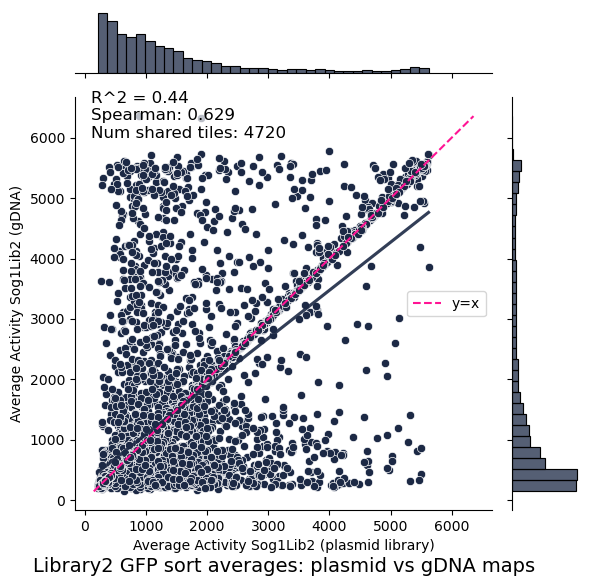

In [18]:
compare("lib2_avg_plib", "lib2_avg_gdna", activities_compare, y = 6000, titles = ["Average Activity Sog1Lib2 (plasmid library)", "Average Activity Sog1Lib2 (gDNA)"], 
       title = "Library2 GFP sort averages: plasmid vs gDNA maps")

## WT vs Mutant scatters

In [4]:
fromjordan = '/global/scratch/projects/fc_mvslab/data/sequencing/CZB_Feb2024/Sog1_Lib2_map/map_outputs/from_jordan/'
activities = pd.read_csv("Sog1_library2_activities_with_reads_ECspike.csv")
gcn4_tiles = pd.read_csv(fromjordan+"GCN4_phosphovariants_max_lists.csv", sep = ";")
gcn4_tiles['AAseq'] = [x.upper() for x in gcn4_tiles.tile]
# e2fa = e2fa_tiles.merge(activities, how = 'inner', on = 'AAseq')
# e2fa = e2fa[['tf_name','start','end','AAseq','tile','subgroup','lib2_avg','Activity_S3_1','Activity_S3_2','reads_S3_1', 'reads_S3_2','lib2_std','ArrayDNA']]

gcn4 = gcn4_tiles.merge(activities, how = 'inner', on = 'AAseq')
gcn4 = gcn4[['ortholog_tile_name','subgroup','lib2_avg',]]
# gcn4[['ortholog_tile_name', "tile", "subgroup", "Activity_S3_1", "Activity_S3_2",'reads_S3_1', 'reads_S3_2']][gcn4.ortholog_tile_name != "War1_Cterm"].iloc[0:6]
gcn4

ortholog_tile_name            subgroup  \
0                                     GCN4_CAAD40    WT_GCN4_ortholog   
1                                     GCN4_CAAD40           full_pmim   
2                                     GCN4_CAAD40           full_pmut   
3                                      War1_Cterm    WT_GCN4_ortholog   
4                                      War1_Cterm           full_pmim   
..                                            ...                 ...   
367  Cimm_XP_012214147.1_CoccidioidesImmitisRS_81           full_pmut   
368  Cimm_XP_012214147.1_CoccidioidesImmitisRS_81  single_pmim_site_1   
369  Cimm_XP_012214147.1_CoccidioidesImmitisRS_81  single_pmut_site_1   
370  Cimm_XP_012214147.1_CoccidioidesImmitisRS_81  single_pmim_site_2   
371  Cimm_XP_012214147.1_CoccidioidesImmitisRS_81  single_pmut_site_2   

        lib2_avg  
0     836.019736  
1     448.152950  
2    4089.159189  
3    1528.155941  
4     973.120027  
..           ...  
367  2691.868560  
368  4534.842819  
369  1050.116899  
370  1235.784532  
371  1725.963931  

[372 rows x 3 columns]

In [5]:
gcn4_values = gcn4.pivot_table(index='ortholog_tile_name', columns='subgroup', values='lib2_avg') #aggfunc='mean
gcn4_values.head()

subgroup                                            WT_GCN4_ortholog  \
ortholog_tile_name                                                     
Agos_ADL012C_106                                         5485.522907   
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...        712.155074   
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555...       2451.305221   
Cimm_XP_012214147.1_CoccidioidesImmitisRS_81             1048.825426   
Cmal_EMG49335.1_CandidaMaltosaXu316_76                   1523.140618   

subgroup                                              full_pmim    full_pmut  \
ortholog_tile_name                                                             
Agos_ADL012C_106                                    5333.885501  3421.959793   
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...  1012.699035  4384.591121   
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555...  1084.830883   800.706411   
Cimm_XP_012214147.1_CoccidioidesImmitisRS_81        3615.131855  2691.868560   
Cmal_EMG49335.1_CandidaMaltosaXu316_76              1144.509777  5521.473299   

subgroup                                            single_pmim_site_1  \
ortholog_tile_name                                                       
Agos_ADL012C_106                                                   NaN   
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...         4403.201555   
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555...         3508.534686   
Cimm_XP_012214147.1_CoccidioidesImmitisRS_81               4534.842819   
Cmal_EMG49335.1_CandidaMaltosaXu316_76                             NaN   

subgroup                                            single_pmim_site_2  \
ortholog_tile_name                                                       
Agos_ADL012C_106                                                   NaN   
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...          636.233499   
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555...          926.196589   
Cimm_XP_012214147.1_CoccidioidesImmitisRS_81               1235.784532   
Cmal_EMG49335.1_CandidaMaltosaXu316_76                             NaN   

subgroup                                            single_pmim_site_3  \
ortholog_tile_name                                                       
Agos_ADL012C_106                                                   NaN   
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...         1213.633107   
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555...          727.066450   
Cimm_XP_012214147.1_CoccidioidesImmitisRS_81                       NaN   
Cmal_EMG49335.1_CandidaMaltosaXu316_76                             NaN   

subgroup                                            single_pmut_site_1  \
ortholog_tile_name                                                       
Agos_ADL012C_106                                                   NaN   
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...          643.296732   
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555...         2938.427288   
Cimm_XP_012214147.1_CoccidioidesImmitisRS_81               1050.116899   
Cmal_EMG49335.1_CandidaMaltosaXu316_76                             NaN   

subgroup                                            single_pmut_site_2  \
ortholog_tile_name                                                       
Agos_ADL012C_106                                                   NaN   
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...          744.275910   
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555...         3626.448481   
Cimm_XP_012214147.1_CoccidioidesImmitisRS_81               1725.963931   
Cmal_EMG49335.1_CandidaMaltosaXu316_76                             NaN   

subgroup                                            single_pmut_site_3  
ortholog_tile_name                                                      
Agos_ADL012C_106                                                   NaN  
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...          823.384431  
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_175905/941745913.py:54: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 2560x1920 with 0 Axes>

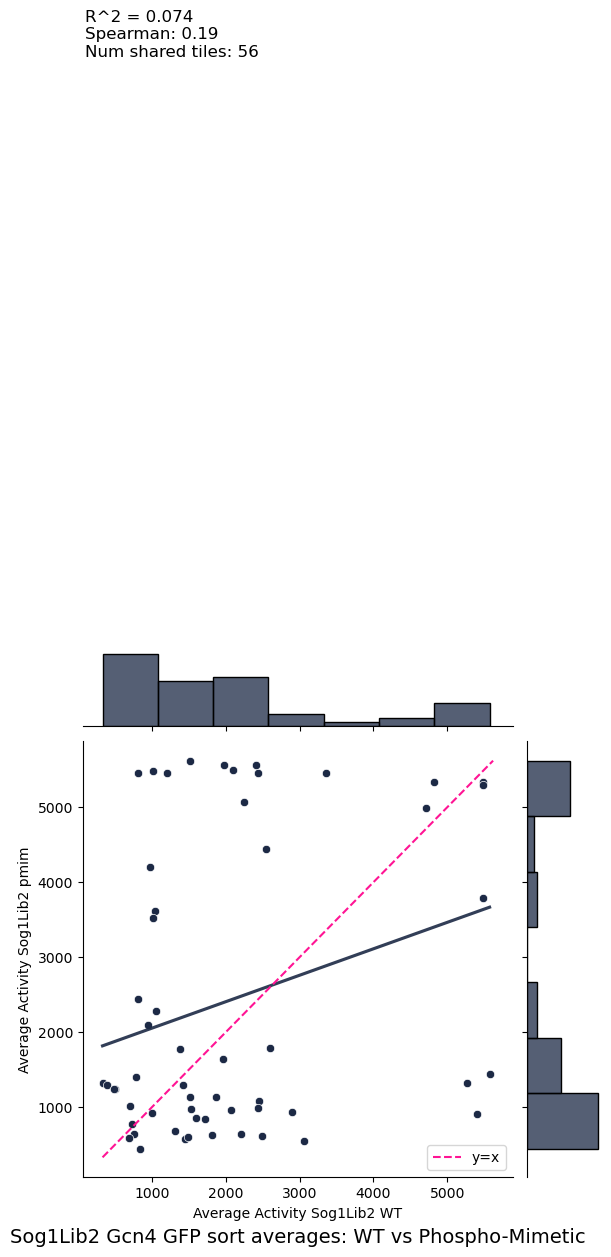

In [8]:
# next do scatters
compare("WT_GCN4_ortholog", "full_pmim", gcn4_values, titles = ["Average Activity Sog1Lib2 WT", "Average Activity Sog1Lib2 pmim"], 
       title = "Sog1Lib2 Gcn4 GFP sort averages: WT vs Phospho-Mimetic")

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_175905/941745913.py:54: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 2560x1920 with 0 Axes>

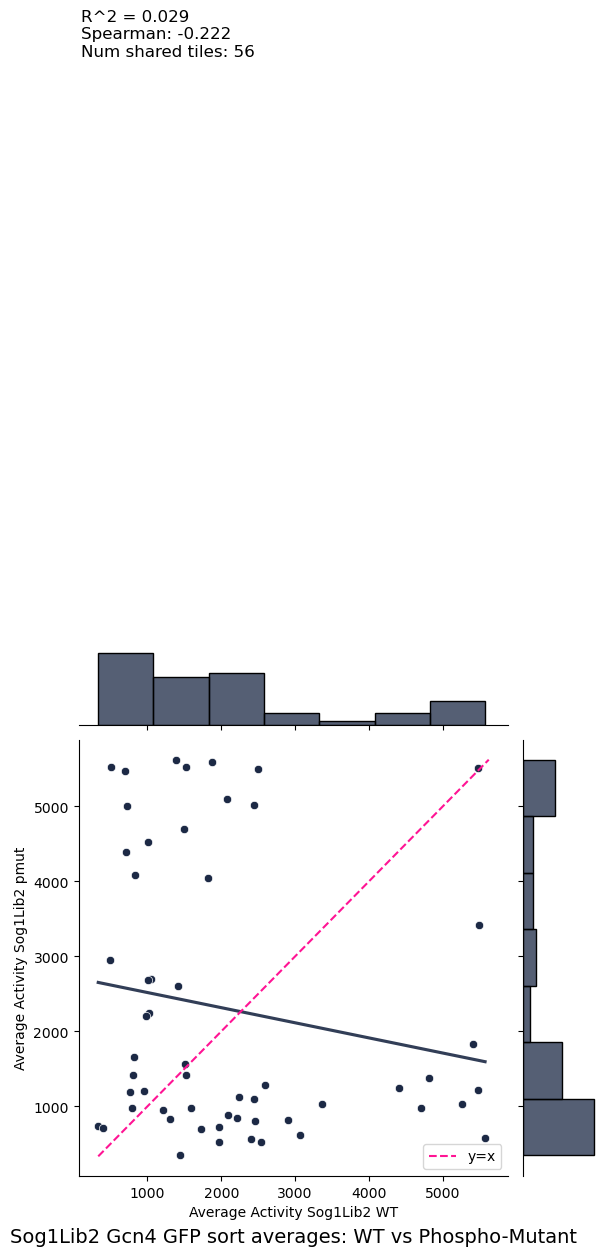

In [18]:
compare("WT_GCN4_ortholog", "full_pmut", gcn4_values,  titles = ["Average Activity Sog1Lib2 WT", "Average Activity Sog1Lib2 pmut"], 
       title = "Sog1Lib2 Gcn4 GFP sort averages: WT vs Phospho-Mutant")

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_175905/941745913.py:54: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 2560x1920 with 0 Axes>

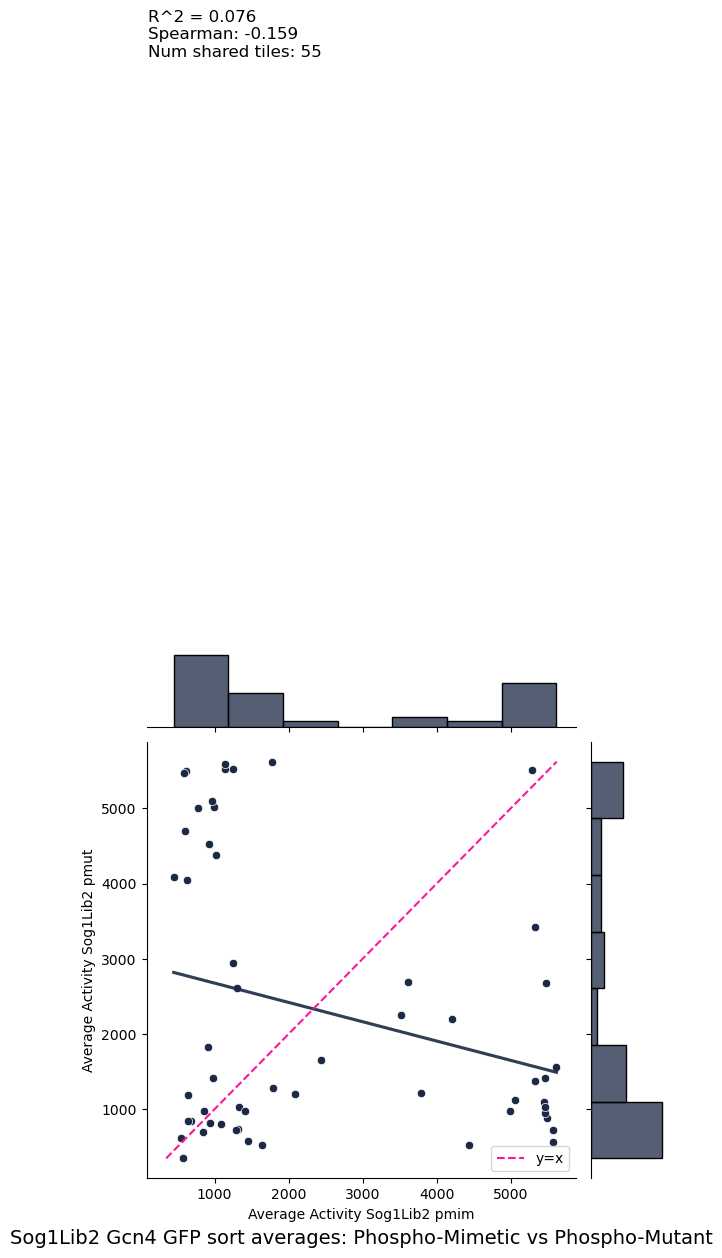

In [19]:
compare("full_pmim", "full_pmut", gcn4_values,  titles = ["Average Activity Sog1Lib2 pmim", "Average Activity Sog1Lib2 pmut"], 
       title = "Sog1Lib2 Gcn4 GFP sort averages: Phospho-Mimetic vs Phospho-Mutant")

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_175905/941745913.py:54: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 2560x1920 with 0 Axes>

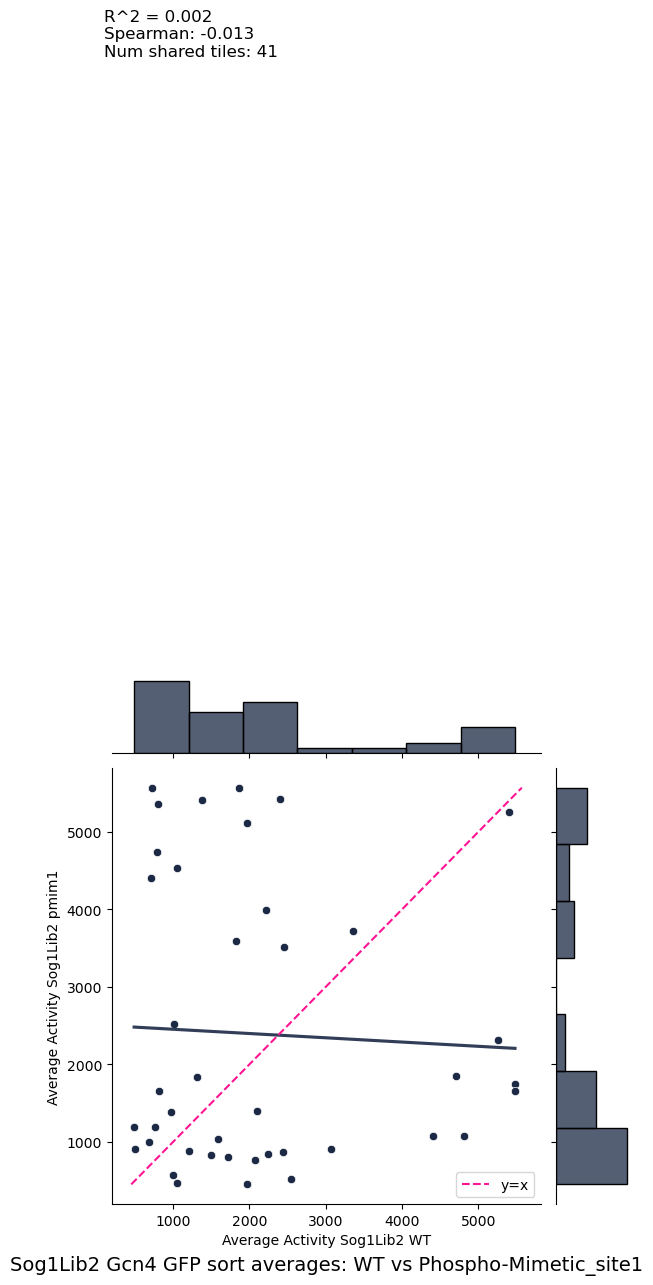

In [20]:
compare("WT_GCN4_ortholog", "single_pmim_site_1", gcn4_values,  titles = ["Average Activity Sog1Lib2 WT", "Average Activity Sog1Lib2 pmim1"], 
       title = "Sog1Lib2 Gcn4 GFP sort averages: WT vs Phospho-Mimetic_site1")

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_175905/941745913.py:54: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 2560x1920 with 0 Axes>

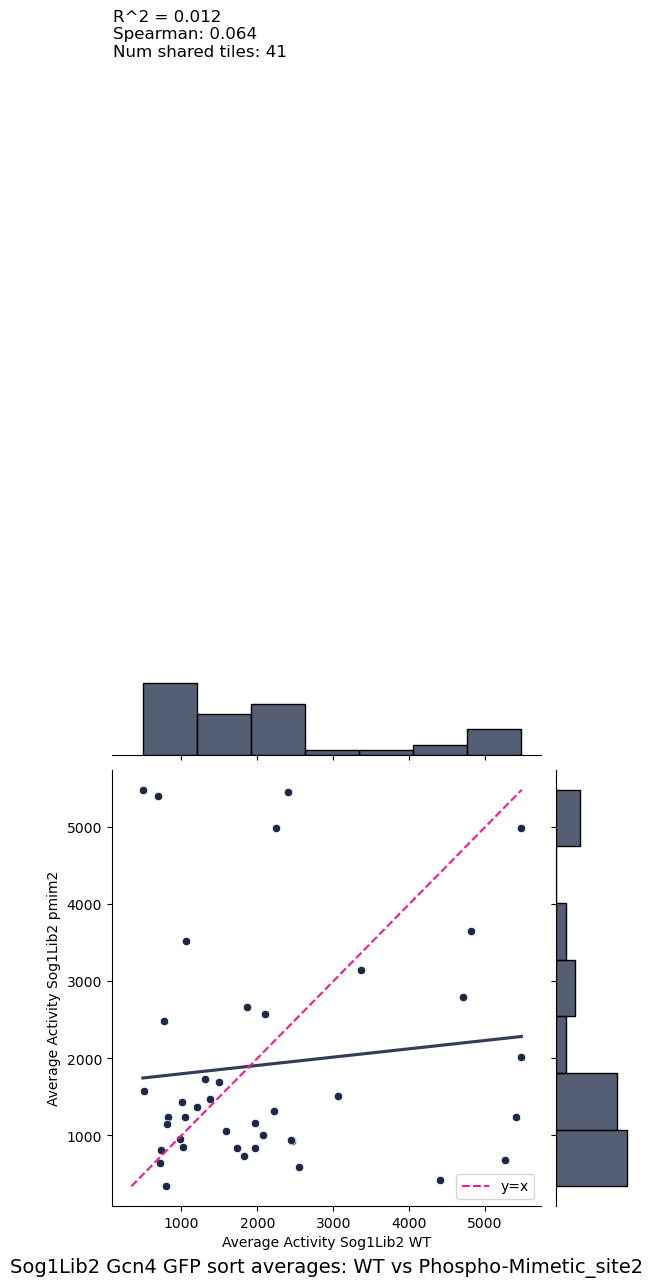

In [21]:
compare("WT_GCN4_ortholog", "single_pmim_site_2", gcn4_values,  titles = ["Average Activity Sog1Lib2 WT", "Average Activity Sog1Lib2 pmim2"], 
       title = "Sog1Lib2 Gcn4 GFP sort averages: WT vs Phospho-Mimetic_site2")

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_175905/941745913.py:54: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 2560x1920 with 0 Axes>

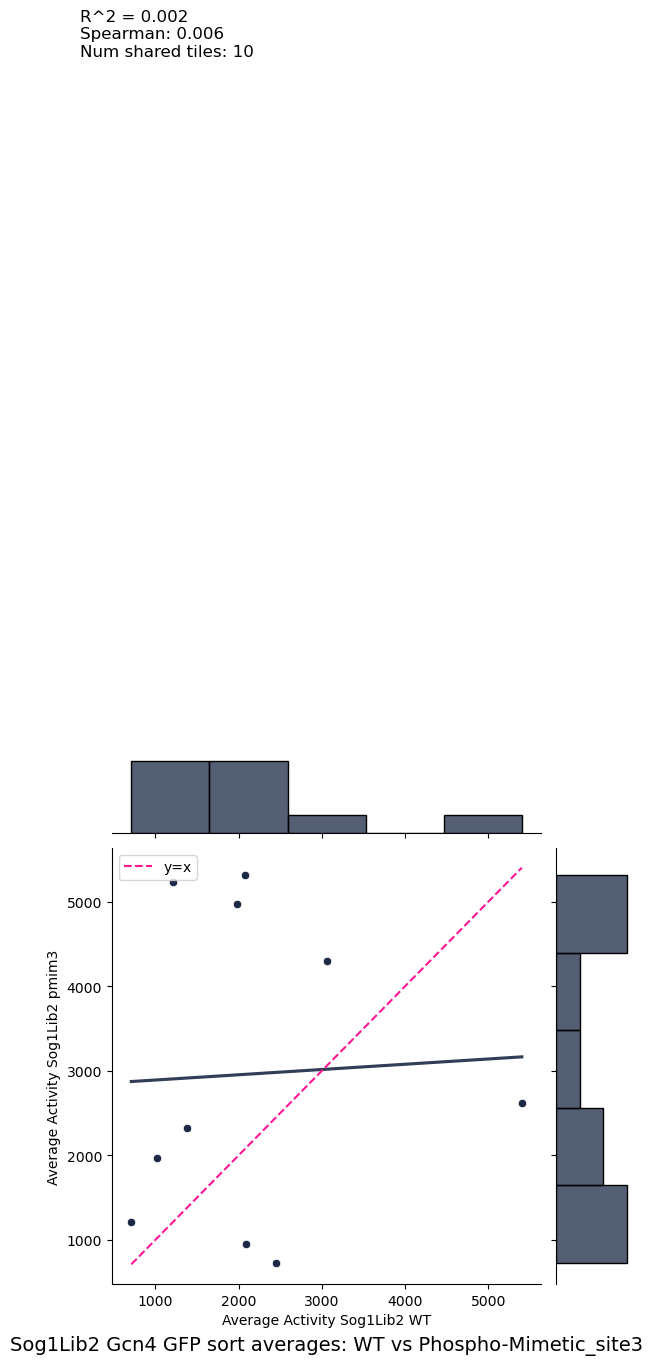

In [22]:
compare("WT_GCN4_ortholog", "single_pmim_site_3", gcn4_values,  titles = ["Average Activity Sog1Lib2 WT", "Average Activity Sog1Lib2 pmim3"], 
       title = "Sog1Lib2 Gcn4 GFP sort averages: WT vs Phospho-Mimetic_site3")

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_175905/941745913.py:54: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 2560x1920 with 0 Axes>

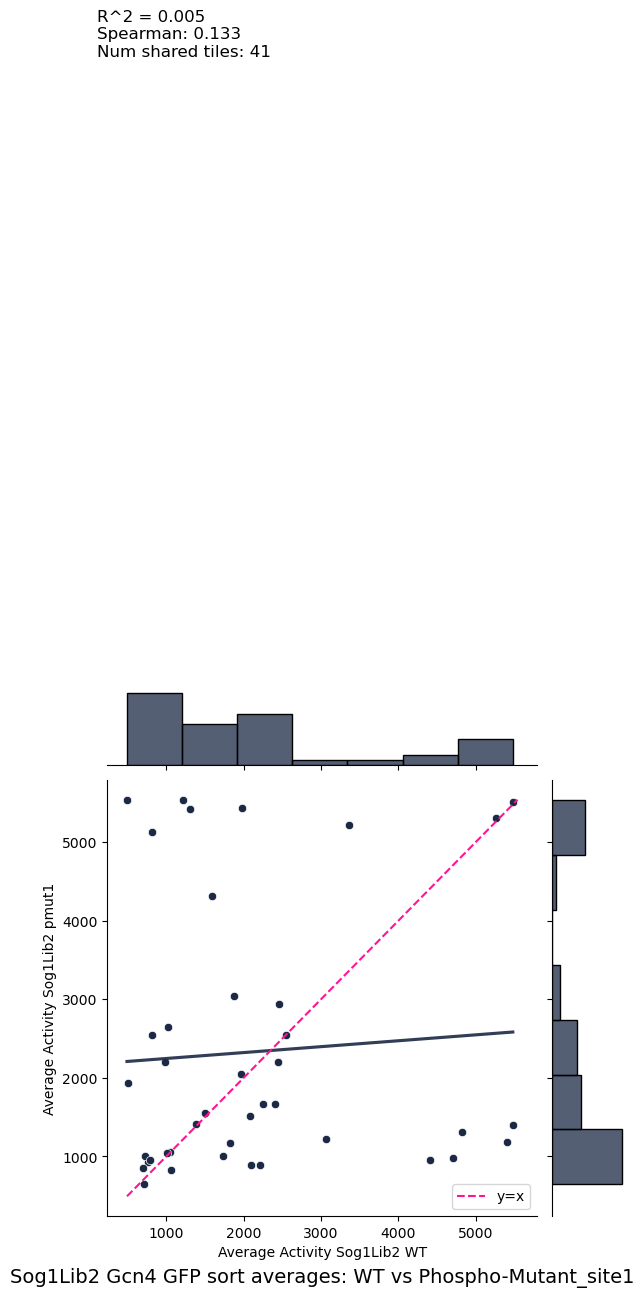

In [23]:
compare("WT_GCN4_ortholog", "single_pmut_site_1", gcn4_values,  titles = ["Average Activity Sog1Lib2 WT", "Average Activity Sog1Lib2 pmut1"], 
       title = "Sog1Lib2 Gcn4 GFP sort averages: WT vs Phospho-Mutant_site1")

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_175905/941745913.py:54: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 2560x1920 with 0 Axes>

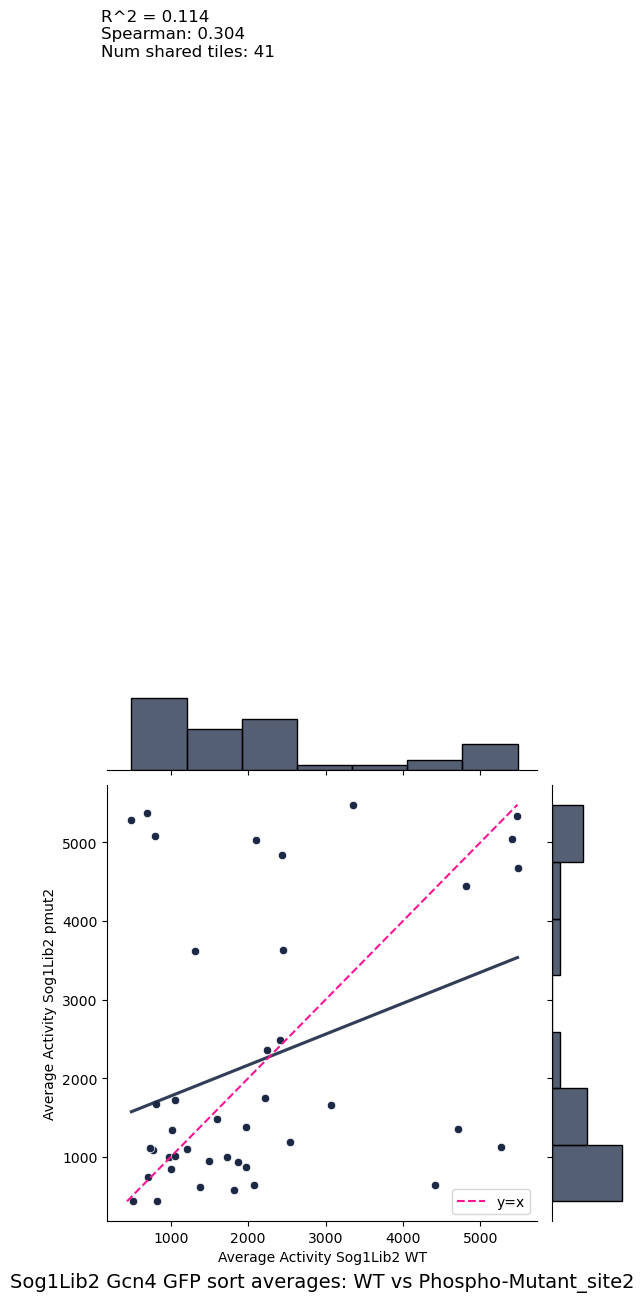

In [24]:
compare("WT_GCN4_ortholog", "single_pmut_site_2", gcn4_values,  titles = ["Average Activity Sog1Lib2 WT", "Average Activity Sog1Lib2 pmut2"], 
       title = "Sog1Lib2 Gcn4 GFP sort averages: WT vs Phospho-Mutant_site2")

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_175905/941745913.py:54: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 2560x1920 with 0 Axes>

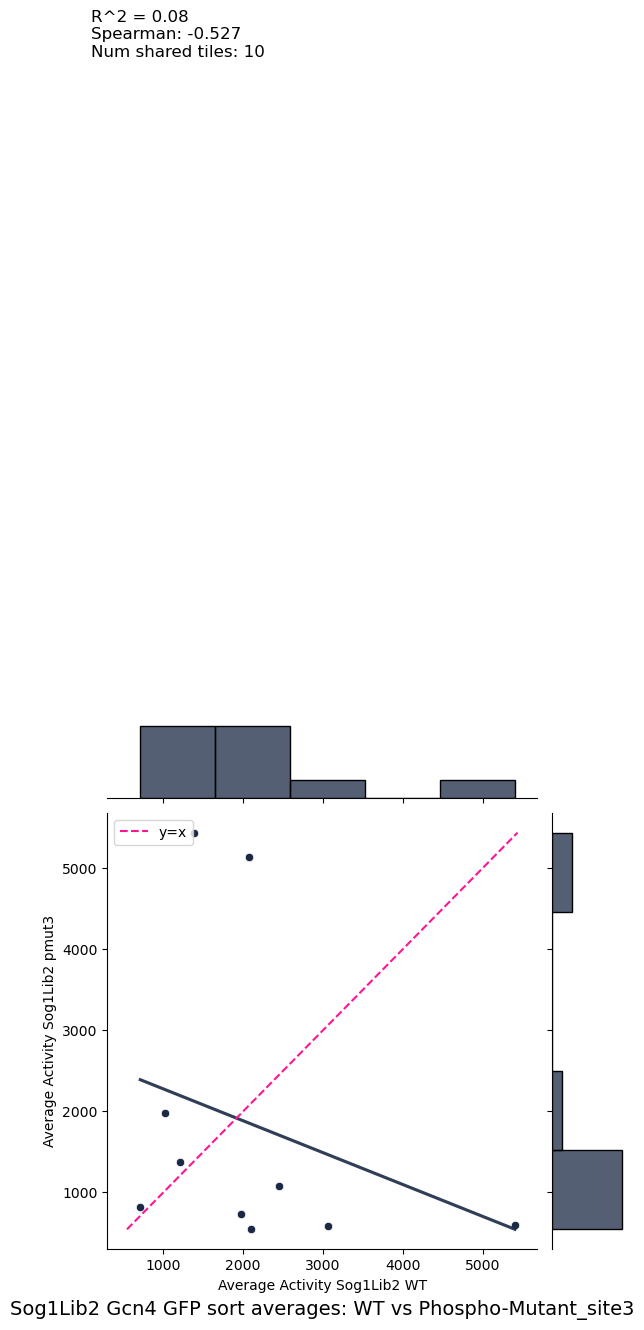

In [25]:
compare("WT_GCN4_ortholog", "single_pmut_site_3", gcn4_values,  titles = ["Average Activity Sog1Lib2 WT", "Average Activity Sog1Lib2 pmut3"], 
       title = "Sog1Lib2 Gcn4 GFP sort averages: WT vs Phospho-Mutant_site3")

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_175905/941745913.py:54: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 2560x1920 with 0 Axes>

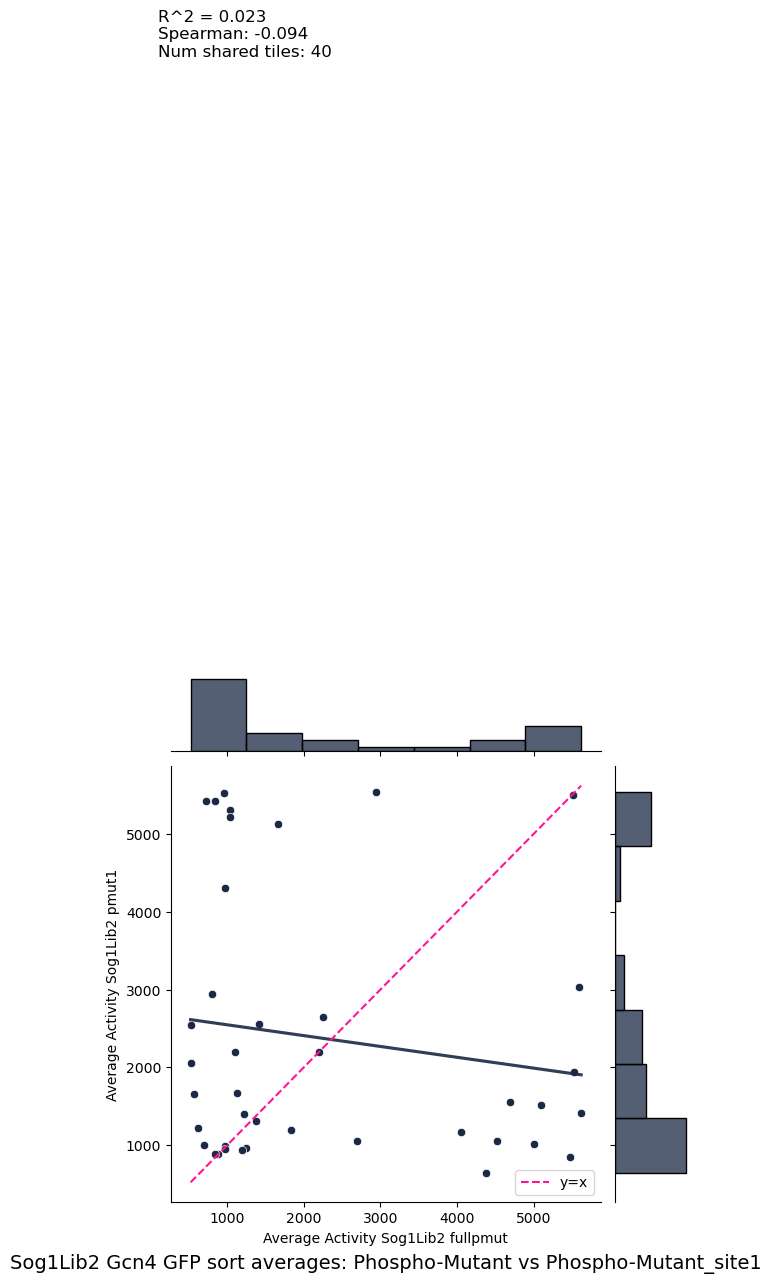

In [29]:
compare("full_pmut", "single_pmut_site_1", gcn4_values,  titles = ["Average Activity Sog1Lib2 fullpmut", "Average Activity Sog1Lib2 pmut1"], 
       title = "Sog1Lib2 Gcn4 GFP sort averages: Phospho-Mutant vs Phospho-Mutant_site1")

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_175905/941745913.py:54: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 2560x1920 with 0 Axes>

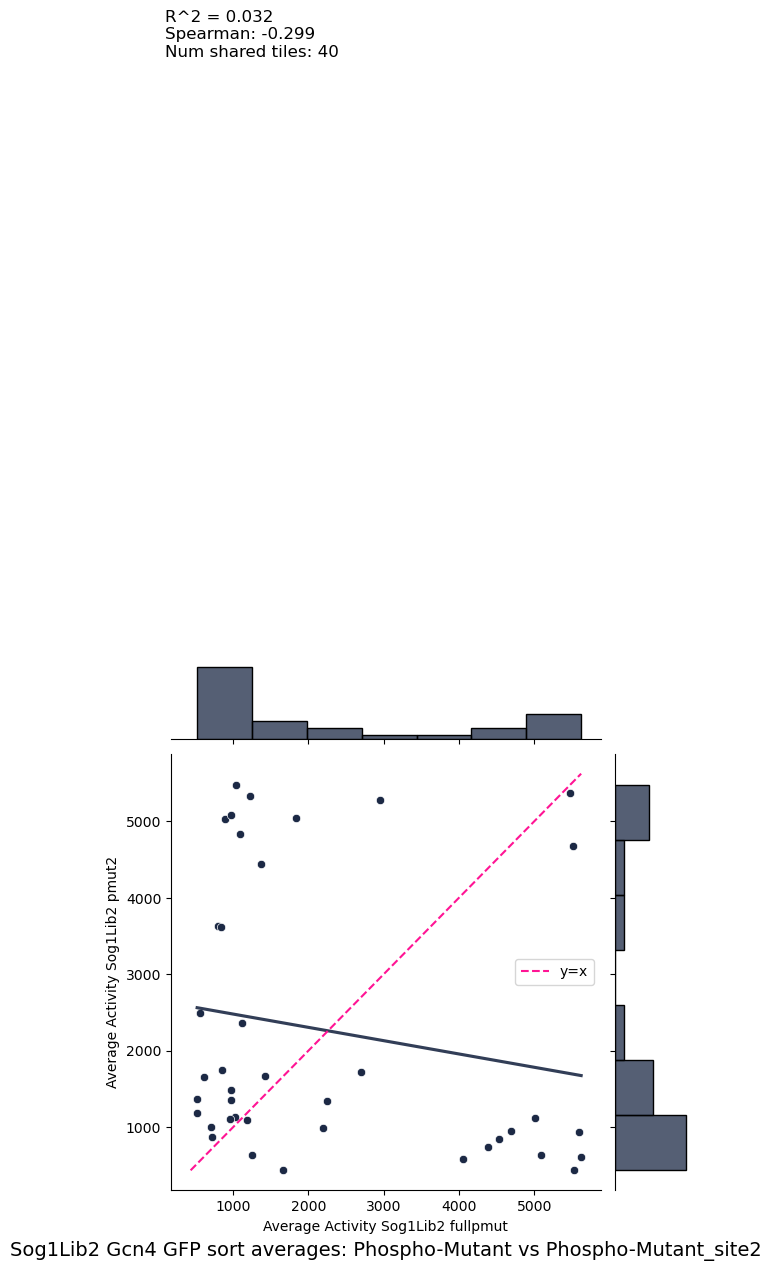

In [28]:
compare("full_pmut", "single_pmut_site_2", gcn4_values,  titles = ["Average Activity Sog1Lib2 fullpmut", "Average Activity Sog1Lib2 pmut2"], 
       title = "Sog1Lib2 Gcn4 GFP sort averages: Phospho-Mutant vs Phospho-Mutant_site2")

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_175905/941745913.py:54: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 2560x1920 with 0 Axes>

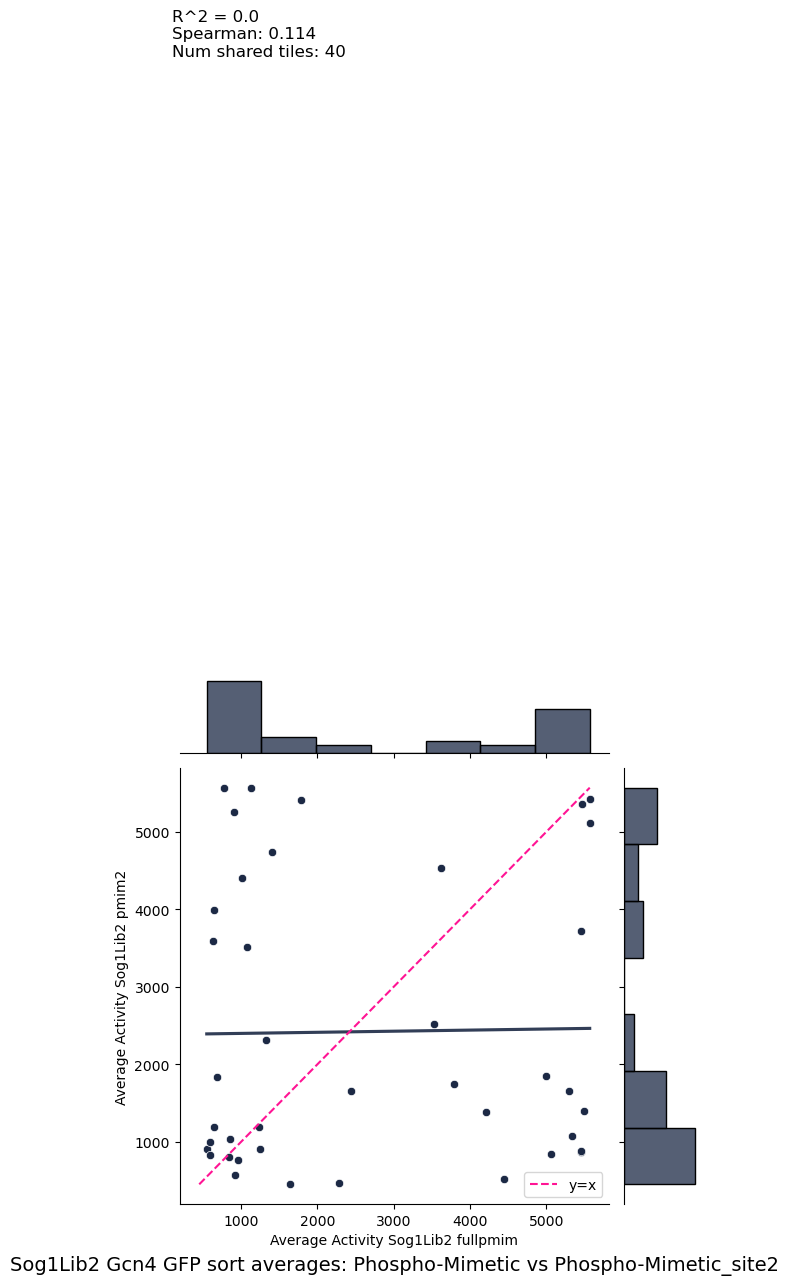

In [30]:
compare("full_pmim", "single_pmim_site_1", gcn4_values,  titles = ["Average Activity Sog1Lib2 fullpmim", "Average Activity Sog1Lib2 pmim2"], 
       title = "Sog1Lib2 Gcn4 GFP sort averages: Phospho-Mimetic vs Phospho-Mimetic_site2")

In [11]:
gcn4_values.head()

subgroup                                            WT_GCN4_ortholog  \
ortholog_tile_name                                                     
Agos_ADL012C_106                                         5485.522907   
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...        712.155074   
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555...       2451.305221   
Cimm_XP_012214147.1_CoccidioidesImmitisRS_81             1048.825426   
Cmal_EMG49335.1_CandidaMaltosaXu316_76                   1523.140618   

subgroup                                              full_pmim    full_pmut  \
ortholog_tile_name                                                             
Agos_ADL012C_106                                    5333.885501  3421.959793   
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...  1012.699035  4384.591121   
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555...  1084.830883   800.706411   
Cimm_XP_012214147.1_CoccidioidesImmitisRS_81        3615.131855  2691.868560   
Cmal_EMG49335.1_CandidaMaltosaXu316_76              1144.509777  5521.473299   

subgroup                                            single_pmim_site_1  \
ortholog_tile_name                                                       
Agos_ADL012C_106                                                   NaN   
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...         4403.201555   
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555...         3508.534686   
Cimm_XP_012214147.1_CoccidioidesImmitisRS_81               4534.842819   
Cmal_EMG49335.1_CandidaMaltosaXu316_76                             NaN   

subgroup                                            single_pmim_site_2  \
ortholog_tile_name                                                       
Agos_ADL012C_106                                                   NaN   
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...          636.233499   
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555...          926.196589   
Cimm_XP_012214147.1_CoccidioidesImmitisRS_81               1235.784532   
Cmal_EMG49335.1_CandidaMaltosaXu316_76                             NaN   

subgroup                                            single_pmim_site_3  \
ortholog_tile_name                                                       
Agos_ADL012C_106                                                   NaN   
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...         1213.633107   
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555...          727.066450   
Cimm_XP_012214147.1_CoccidioidesImmitisRS_81                       NaN   
Cmal_EMG49335.1_CandidaMaltosaXu316_76                             NaN   

subgroup                                            single_pmut_site_1  \
ortholog_tile_name                                                       
Agos_ADL012C_106                                                   NaN   
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...          643.296732   
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555...         2938.427288   
Cimm_XP_012214147.1_CoccidioidesImmitisRS_81               1050.116899   
Cmal_EMG49335.1_CandidaMaltosaXu316_76                             NaN   

subgroup                                            single_pmut_site_2  \
ortholog_tile_name                                                       
Agos_ADL012C_106                                                   NaN   
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...          744.275910   
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555...         3626.448481   
Cimm_XP_012214147.1_CoccidioidesImmitisRS_81               1725.963931   
Cmal_EMG49335.1_CandidaMaltosaXu316_76                             NaN   

subgroup                                            single_pmut_site_3  
ortholog_tile_name                                                      
Agos_ADL012C_106                                                   NaN  
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...          823.384431  
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555

## Is the activity of Gcn4Alt high?

In [42]:
gcn4_values[gcn4_values['WT_GCN4_ortholog']<398]

subgroup            WT_GCN4_ortholog    full_pmim   full_pmut  \
ortholog_tile_name                                              
Ecym_4497_111              334.48688  1321.370913  734.324728   
GCN4alt                    397.26536  1295.819950  717.095391   

subgroup            single_pmim_site_1  single_pmim_site_2  \
ortholog_tile_name                                           
Ecym_4497_111                      NaN                 NaN   
GCN4alt                            NaN                 NaN   

subgroup            single_pmim_site_3  single_pmut_site_1  \
ortholog_tile_name                                           
Ecym_4497_111                      NaN                 NaN   
GCN4alt                            NaN                 NaN   

subgroup            single_pmut_site_2  single_pmut_site_3  
ortholog_tile_name                                          
Ecym_4497_111                      NaN                 NaN  
GCN4alt                            NaN                 NaN

In [47]:
gcn4_values_copy = gcn4_values.copy(deep=True)
gcn4_values_copy = gcn4_values_copy.reset_index()
# gcn4_values_copy[(gcn4_values_copy['ortholog_tile_name'] == 'GCN4alt') or (gcn4_values_copy['ortholog_tile_name'] == 'Agos_ADL012C_106') ] or(gcn4_values_copy['ortholog_tile_name'] == 'Ecym_4497_111'

<Axes: xlabel='ortholog_tile_name'>

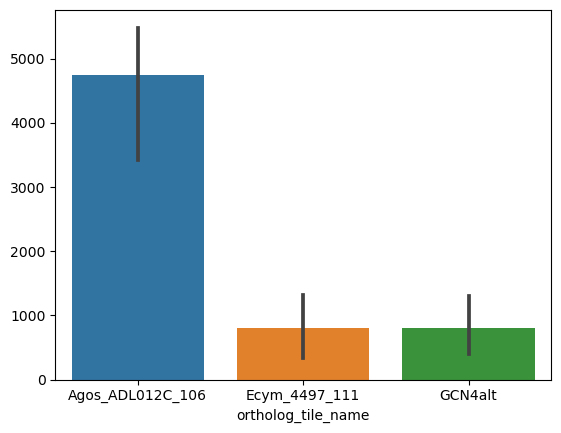

In [65]:
gcn4alttest = gcn4_values_copy[(gcn4_values_copy['ortholog_tile_name'].isin(['GCN4alt', 'Agos_ADL012C_106', 'Ecym_4497_111']))].reset_index()
gcn4alttest = gcn4alttest[['WT_GCN4_ortholog','full_pmim','full_pmut','ortholog_tile_name']].set_index('ortholog_tile_name')
gcn4alttest = gcn4alttest.T
sns.barplot(gcn4alttest)


KeyError: 'ortholog_tile_name'

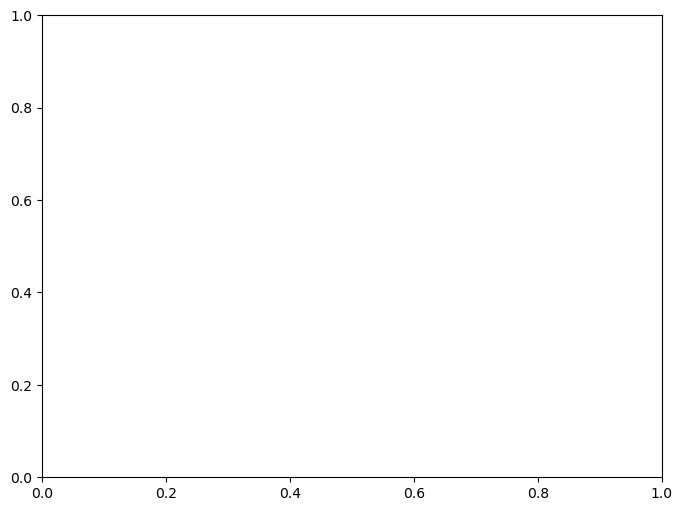

In [68]:
# all best
fig, axes = plt.subplots(1,1, figsize=(8, 6), dpi = 100)

sns.lineplot(x = 'subgroup', y = 'lib2_avg',
             # hue = 'ortholog_tile_name', 
             data = gcn4alttest[gcn4alttest[gcn4alttest['ortholog_tile_name'].isin(['GCN4alt'])]], legend = False)
axes.tick_params('x', labelsize = 8, bottom = True, labelrotation = 20, pad = 0)

# Follow up on phosphomutants - Max's requested analysis September 27 (analysis performed October 11, 2024)

In [182]:
gcn4_values = good_gcn4_all.pivot_table(index='ortholog_tile_name', columns='subgroup', values='lib2_avg') #aggfunc='mean
gcn4_values.head()

subgroup                                            WT_GCN4_ortholog  \
ortholog_tile_name                                                     
Agos_ADL012C_106                                         5485.522907   
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...        712.155074   
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555...       2451.305221   
Cimm_XP_012214147.1_CoccidioidesImmitisRS_81             1048.825426   
Cmal_EMG49335.1_CandidaMaltosaXu316_76                           NaN   

subgroup                                              full_pmim    full_pmut  \
ortholog_tile_name                                                             
Agos_ADL012C_106                                    5333.885501  3421.959793   
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...  1012.699035  4384.591121   
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555...  1084.830883   800.706411   
Cimm_XP_012214147.1_CoccidioidesImmitisRS_81        3615.131855  2691.868560   
Cmal_EMG49335.1_CandidaMaltosaXu316_76              1144.509777  5521.473299   

subgroup                                            single_pmim_site_1  \
ortholog_tile_name                                                       
Agos_ADL012C_106                                                   NaN   
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...         4403.201555   
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555...         3508.534686   
Cimm_XP_012214147.1_CoccidioidesImmitisRS_81               4534.842819   
Cmal_EMG49335.1_CandidaMaltosaXu316_76                             NaN   

subgroup                                            single_pmim_site_2  \
ortholog_tile_name                                                       
Agos_ADL012C_106                                                   NaN   
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...          636.233499   
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555...          926.196589   
Cimm_XP_012214147.1_CoccidioidesImmitisRS_81               1235.784532   
Cmal_EMG49335.1_CandidaMaltosaXu316_76                             NaN   

subgroup                                            single_pmim_site_3  \
ortholog_tile_name                                                       
Agos_ADL012C_106                                                   NaN   
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...         1213.633107   
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555...          727.066450   
Cimm_XP_012214147.1_CoccidioidesImmitisRS_81                       NaN   
Cmal_EMG49335.1_CandidaMaltosaXu316_76                             NaN   

subgroup                                            single_pmut_site_1  \
ortholog_tile_name                                                       
Agos_ADL012C_106                                                   NaN   
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...          643.296732   
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555...         2938.427288   
Cimm_XP_012214147.1_CoccidioidesImmitisRS_81               1050.116899   
Cmal_EMG49335.1_CandidaMaltosaXu316_76                             NaN   

subgroup                                            single_pmut_site_2  \
ortholog_tile_name                                                       
Agos_ADL012C_106                                                   NaN   
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...          744.275910   
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555...         3626.448481   
Cimm_XP_012214147.1_CoccidioidesImmitisRS_81               1725.963931   
Cmal_EMG49335.1_CandidaMaltosaXu316_76                             NaN   

subgroup                                            single_pmut_site_3  
ortholog_tile_name                                                      
Agos_ADL012C_106                                                   NaN  
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...          823.384431  
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555

## For tiles with all three do line graph


In [183]:
gcn4_values_fulmut = gcn4_values.copy(deep=True)
gcn4_values_fulmut = gcn4_values_fulmut.reset_index()
gcn4_values_fulmut = gcn4_values_fulmut[['full_pmim','WT_GCN4_ortholog','full_pmut','ortholog_tile_name']]

In [184]:
gcn4_values_fulmut = gcn4_values_fulmut[~gcn4_values_fulmut.isna().any(axis=1)]

In [185]:
gcn4_values_fulmut

subgroup    full_pmim  WT_GCN4_ortholog    full_pmut  \
0         5333.885501       5485.522907  3421.959793   
1         1012.699035        712.155074  4384.591121   
2         1084.830883       2451.305221   800.706411   
3         3615.131855       1048.825426  2691.868560   
5          616.484692       2494.628446  5491.348064   
6         2091.605758        951.627683  1204.411117   
11        4439.520411       2542.444474   521.324174   
12         553.345392       3065.411765   618.511313   
14        1321.370913        334.486880   734.324728   
15        5454.822129       2438.481565  1096.720151   
17        4207.860345        978.461660  2199.180171   
18         909.122771       5401.627051  1828.265070   
19        5566.731502       1975.559342   722.575237   
20        5330.586959       4816.173006  1375.287220   
23        1449.050456       5571.064507   582.853913   
24         575.733035       1444.695057   346.360145   
28        5475.593985       1011.423802  2682.970165   
31         992.784478       2438.610450  5016.486420   
33        5492.952826       2094.378559   884.722271   
35        5064.358250       2244.610369  1121.180952   
36        1243.227260        491.947096  2947.041404   
37         592.929269        692.610746  5476.640612   
43        1297.671576       1420.888427  2608.235836   
44         852.973151       1592.713042   972.163341   
45         776.303842        726.967560  5003.061516   
46        5290.352365       5478.199479  5508.878150   
49        5458.784285       1211.125595   950.917818   
50         919.666409       1005.823886  4523.674646   
51        5460.030188        809.123100  1420.141378   
52        5458.661819       3358.839805  1035.556292   
56         644.501645       2213.302968   844.856782   

subgroup                                 ortholog_tile_name  
0                                          Agos_ADL012C_106  
1         Blastocladiomycota_jgi|Catan2|1466814|fgenesh1...  
2         Blastocladiomycota_jgi|Catan2|1506241|gm1.1155...  
3              Cimm_XP_012214147.1_CoccidioidesImmitisRS_81  
5               Cort_emb_CCG25633.1_CandidaOrthopsilosis_81  
6                                         Cpar_CPAG02317_86  
11        Dothideomycetes_jgi|Settu3|1307314|e_gw1.7.816...  
12        Dothideomycetes_jgi|Ternu1|257952|gw1.42.157.1_71  
14                                            Ecym_4497_111  
15        Eurotiomycetes_jgi|Aspsublat1|34395|CE34394_10...  
17        Eurotiomycetes_jgi|Gymci1_1|302926|estExt_Gene...  
18        Eurotiomycetes_jgi|Monpu1|447840|e_gw1.132.9.1_56  
19        Eurotiomycetes_jgi|Penatra1|34211|e_gw1.2.1490...  
20            Eurotiomycetes_jgi|Theau1|5329|gm1.5329_g_631  
23                                      Karf_KAFR0L00510_71  
24                                     Kwal_Kwal55.20854_81  
28          Leotiomycetes_jgi|Melbi2|682398|gm1.11251_g_436  
31           Leotiomycetes_jgi|Rhier1|701962|gm1.6137_g_636  
33         Pezizomycetes_jgi|Ascim1|93291|CE93290_30315_181  
35        Pezizomycetes_jgi|Chove1|1732154|estExt_Genewi...  
36        Pezizomycetes_jgi|Geocar1|698986|estExt_Genewi...  
37           Pezizomycetes_jgi|Morco1|575945|gm1.6721_g_741  
43         Sordariomycetes_jgi|Colac2|536182|gw1.162.9.1_71  
44        Sordariomycetes_jgi|Daces1|470292|estExt_Genew...  
45        Sordariomycetes_jgi|Entma1|346888|fgenesh1_pg....  
46        Sordariomycetes_jgi|FoxF1003_1|606664|fgenesh1...  
49        Sordariomycetes_jgi|Neucr4830_1|533472|estExt_...  
50        Sordariomycetes_jgi|OphPMI507_1|356537|estExt_...  
51        Sordariomycetes_jgi|Sodal1|284404|e_gw1.12.174...  
52        Sordariomycetes_jgi|Trici4|1122955|e_gw1.10.10...  
56        Xylonomycetes_jgi|Xylhe1|257815|estExt_fgenesh...

In [186]:
gcn4_values_fulmut_melt = pd.melt(gcn4_values_fulmut, id_vars='ortholog_tile_name', value_name='lib2_avg' )

In [187]:
print(gcn4_values_fulmut_melt.head())

                                  ortholog_tile_name   subgroup     lib2_avg
0                                   Agos_ADL012C_106  full_pmim  5333.885501
1  Blastocladiomycota_jgi|Catan2|1466814|fgenesh1...  full_pmim  1012.699035
2  Blastocladiomycota_jgi|Catan2|1506241|gm1.1155...  full_pmim  1084.830883
3       Cimm_XP_012214147.1_CoccidioidesImmitisRS_81  full_pmim  3615.131855
4        Cort_emb_CCG25633.1_CandidaOrthopsilosis_81  full_pmim   616.484692


/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_d

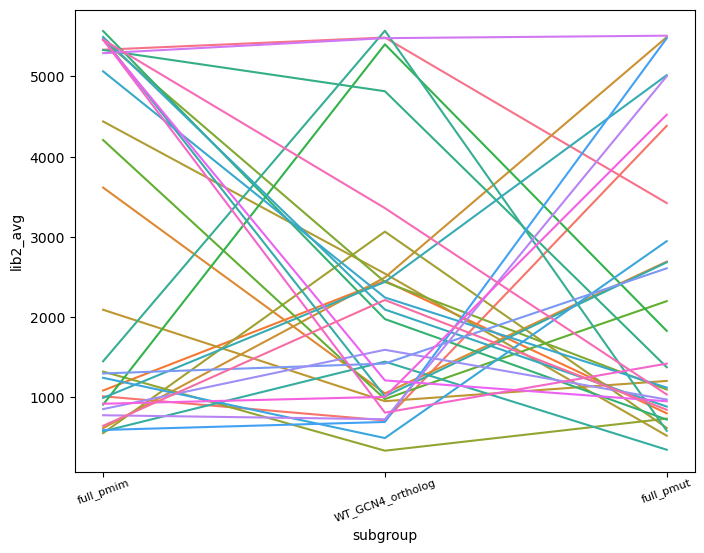

In [188]:
# all best
fig, axes = plt.subplots(1,1, figsize=(8, 6), dpi = 100)

sns.lineplot(x = 'subgroup', y = 'lib2_avg',hue = 'ortholog_tile_name', data = gcn4_values_fulmut_melt, legend = False)
axes.tick_params('x', labelsize = 8, bottom = True, labelrotation = 20, pad = 0)

In [189]:

gcn4_values_fulmut.head()

subgroup    full_pmim  WT_GCN4_ortholog    full_pmut  \
0         5333.885501       5485.522907  3421.959793   
1         1012.699035        712.155074  4384.591121   
2         1084.830883       2451.305221   800.706411   
3         3615.131855       1048.825426  2691.868560   
5          616.484692       2494.628446  5491.348064   

subgroup                                 ortholog_tile_name  
0                                          Agos_ADL012C_106  
1         Blastocladiomycota_jgi|Catan2|1466814|fgenesh1...  
2         Blastocladiomycota_jgi|Catan2|1506241|gm1.1155...  
3              Cimm_XP_012214147.1_CoccidioidesImmitisRS_81  
5               Cort_emb_CCG25633.1_CandidaOrthopsilosis_81

In [190]:
# value differences
gcn4_values_fulmut['pmim-WT'] = gcn4_values_fulmut['full_pmim'] - gcn4_values_fulmut['WT_GCN4_ortholog']
gcn4_values_fulmut['pmut-WT'] = gcn4_values_fulmut['full_pmut'] - gcn4_values_fulmut['WT_GCN4_ortholog']

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_d

Text(0.5, 1.0, 'Phosphomutant increases activity from low to high')

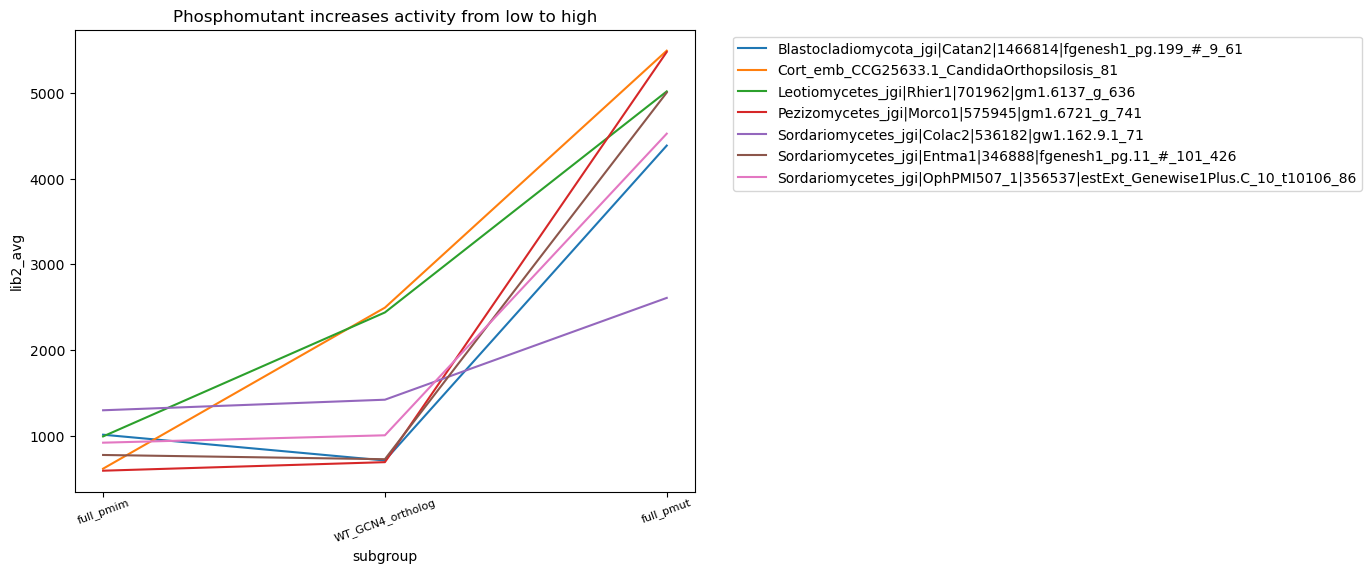

In [191]:
# Phosphomutant increases activity
mimlow_muthigh = gcn4_values_fulmut[(gcn4_values_fulmut['pmim-WT']<500)&(gcn4_values_fulmut['pmut-WT']>1000)]

fig, axes = plt.subplots(1,1, figsize=(8, 6), dpi = 100)

sns.lineplot(x = 'subgroup', y = 'lib2_avg',hue = 'ortholog_tile_name', 
             data = pd.melt(mimlow_muthigh, id_vars='ortholog_tile_name', 
                            value_vars=['full_pmim','WT_GCN4_ortholog','full_pmut'], value_name='lib2_avg' ), 
             legend = True)
axes.tick_params('x', labelsize = 8, bottom = True, labelrotation = 20, pad = 0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Phosphomutant increases activity from low to high')

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_d

Text(0.5, 1.0, 'Phosphomimetic increases activity')

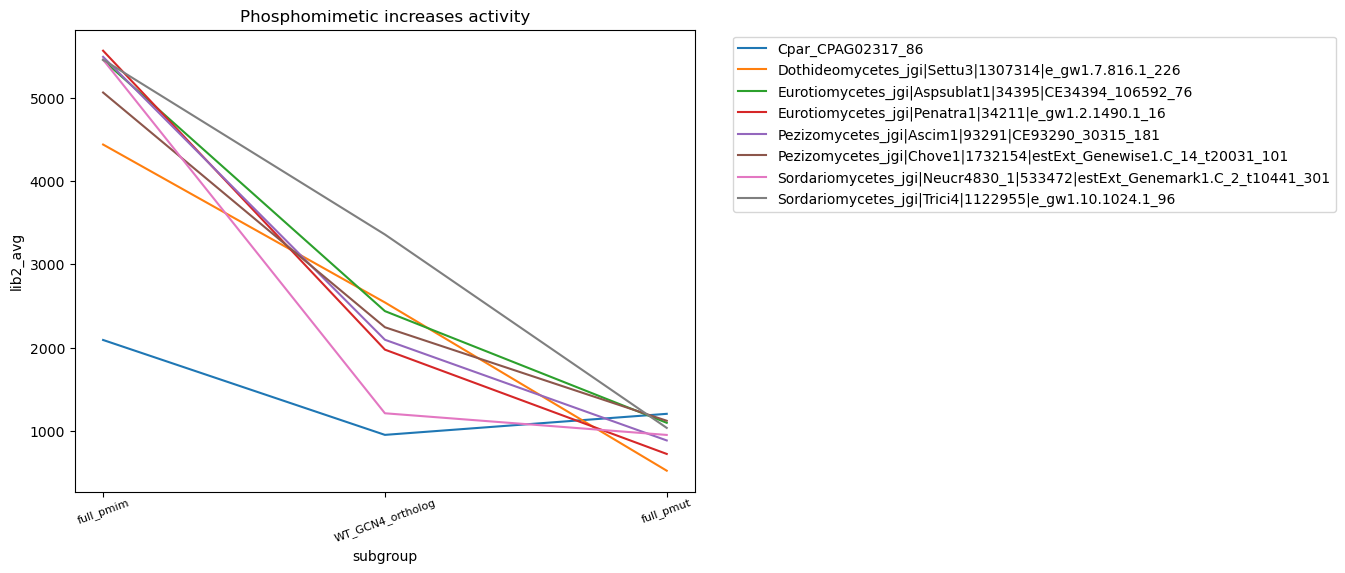

In [192]:
# Phosphomimetic increases activity
mimhigh_mutlow = gcn4_values_fulmut[(gcn4_values_fulmut['pmim-WT']>1000)&(gcn4_values_fulmut['pmut-WT']<500)]

fig, axes = plt.subplots(1,1, figsize=(8, 6), dpi = 100)

sns.lineplot(x = 'subgroup', y = 'lib2_avg',hue = 'ortholog_tile_name', 
             data = pd.melt(mimhigh_mutlow, id_vars='ortholog_tile_name', 
                            value_vars=['full_pmim','WT_GCN4_ortholog','full_pmut'], value_name='lib2_avg' ), 
             legend = True)
axes.tick_params('x', labelsize = 8, bottom = True, labelrotation = 20, pad = 0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Phosphomimetic increases activity')

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_d

Text(0.5, 1.0, 'WT has highest activity')

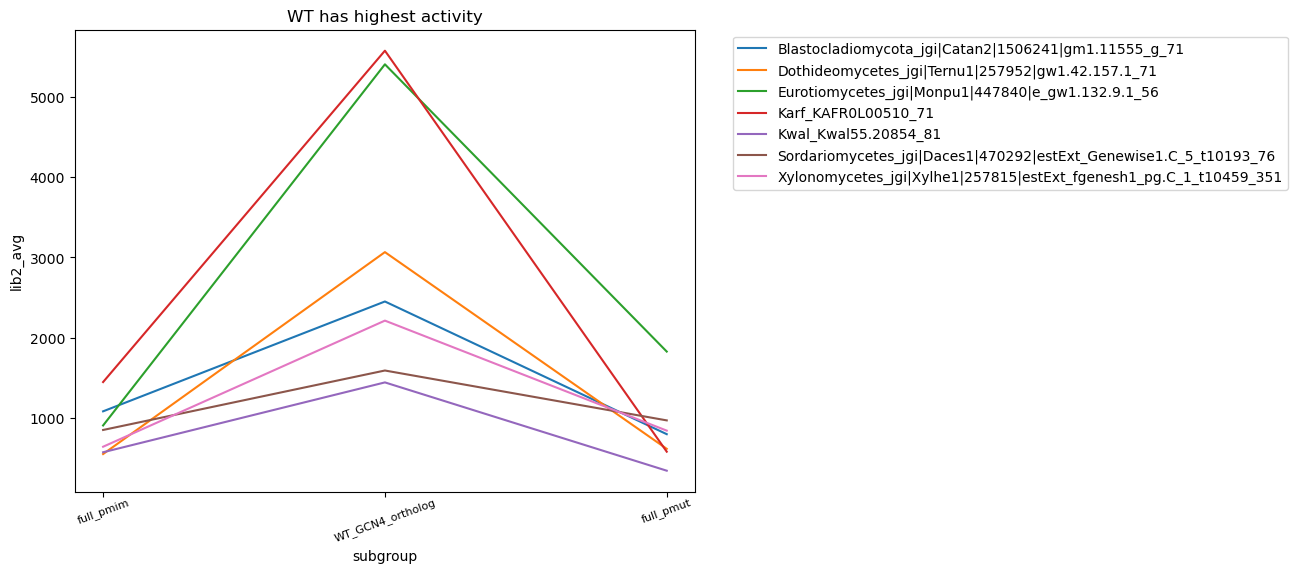

In [193]:
# WT has highest activity
WThigh_plow = gcn4_values_fulmut[(gcn4_values_fulmut['pmim-WT']<-500)&(gcn4_values_fulmut['pmut-WT']<-500)]

fig, axes = plt.subplots(1,1, figsize=(8, 6), dpi = 100)

sns.lineplot(x = 'subgroup', y = 'lib2_avg',hue = 'ortholog_tile_name', 
             data = pd.melt(WThigh_plow, id_vars='ortholog_tile_name', 
                            value_vars=['full_pmim','WT_GCN4_ortholog','full_pmut'], value_name='lib2_avg' ), 
             legend = True)
axes.tick_params('x', labelsize = 8, bottom = True, labelrotation = 20, pad = 0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('WT has highest activity')

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_d

Text(0.5, 1.0, 'WT has lowest activity')

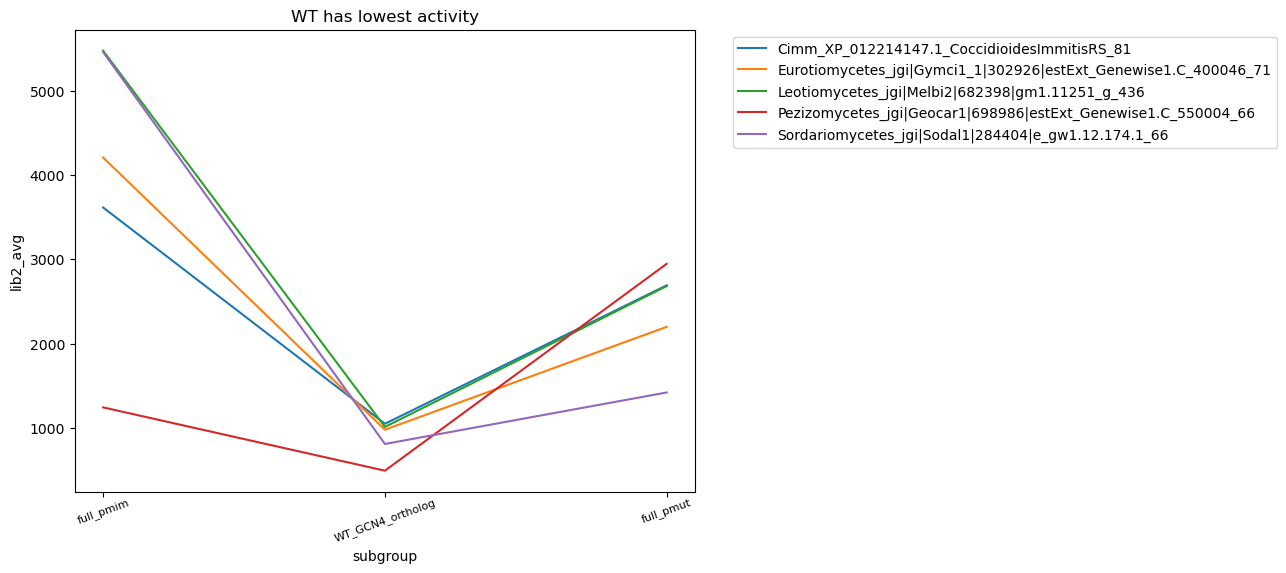

In [194]:
# WT has lowest activity
WTlow_phigh = gcn4_values_fulmut[(gcn4_values_fulmut['pmim-WT']>500)&(gcn4_values_fulmut['pmut-WT']>500)]

fig, axes = plt.subplots(1,1, figsize=(8, 6), dpi = 100)

sns.lineplot(x = 'subgroup', y = 'lib2_avg',hue = 'ortholog_tile_name', 
             data = pd.melt(WTlow_phigh, id_vars='ortholog_tile_name', 
                            value_vars=['full_pmim','WT_GCN4_ortholog','full_pmut'], value_name='lib2_avg' ), 
             legend = True)
axes.tick_params('x', labelsize = 8, bottom = True, labelrotation = 20, pad = 0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('WT has lowest activity')

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_d

Text(0.5, 1.0, 'Phosphomutant has lowest activity')

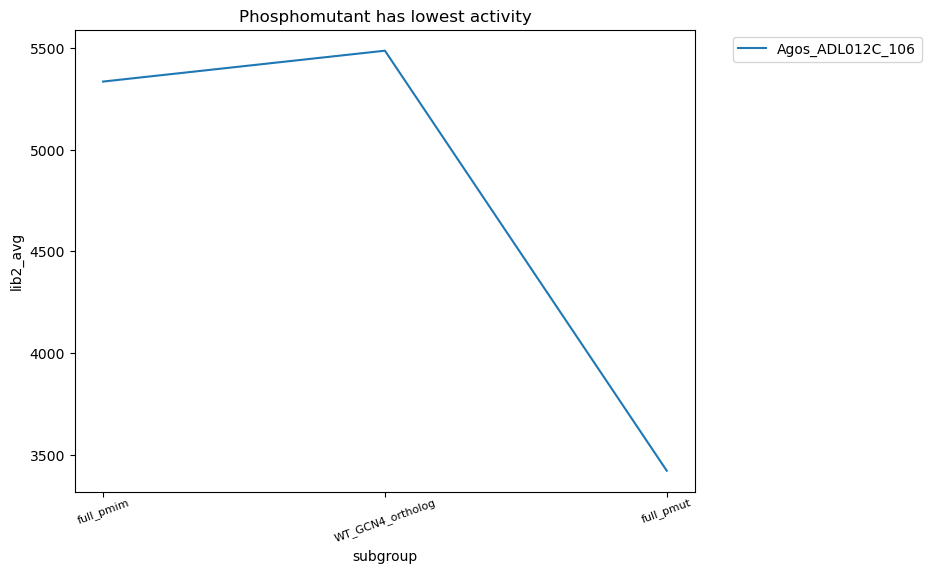

In [195]:
# pmut has lowest activity
pmutlow = gcn4_values_fulmut[(abs(gcn4_values_fulmut['pmim-WT'])<500)&((gcn4_values_fulmut['pmut-WT'])<-500)]

fig, axes = plt.subplots(1,1, figsize=(8, 6), dpi = 100)

sns.lineplot(x = 'subgroup', y = 'lib2_avg',hue = 'ortholog_tile_name', 
             data = pd.melt(pmutlow, id_vars='ortholog_tile_name', 
                            value_vars=['full_pmim','WT_GCN4_ortholog','full_pmut'], value_name='lib2_avg' ), 
             legend = True)
axes.tick_params('x', labelsize = 8, bottom = True, labelrotation = 20, pad = 0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Phosphomutant has lowest activity')

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_d

Text(0.5, 1.0, 'Phosphomimetic has lowest activity')

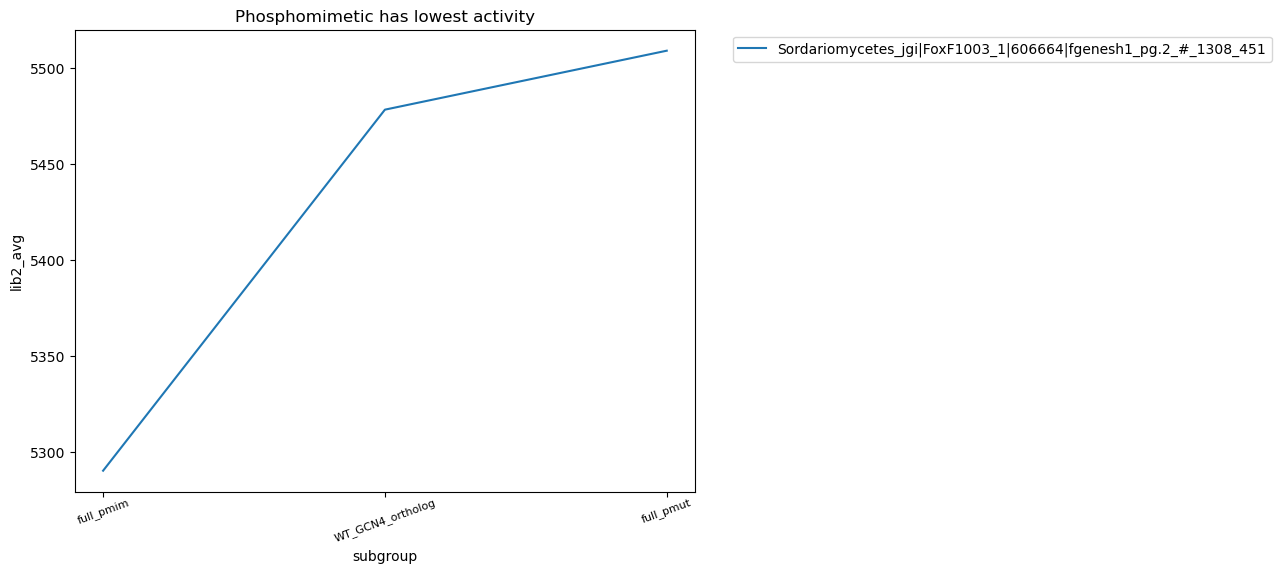

In [200]:
# pmim has lowest activity
pmimlow = gcn4_values_fulmut[(gcn4_values_fulmut['pmim-WT']<0)&(abs(gcn4_values_fulmut['pmut-WT'])<500)]

fig, axes = plt.subplots(1,1, figsize=(8, 6), dpi = 100)

sns.lineplot(x = 'subgroup', y = 'lib2_avg',hue = 'ortholog_tile_name', 
             data = pd.melt(pmimlow, id_vars='ortholog_tile_name', 
                            value_vars=['full_pmim','WT_GCN4_ortholog','full_pmut'], value_name='lib2_avg' ), 
             legend = True)
axes.tick_params('x', labelsize = 8, bottom = True, labelrotation = 20, pad = 0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Phosphomimetic has lowest activity')

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_d

Text(0.5, 1.0, 'Minimal activity changes')

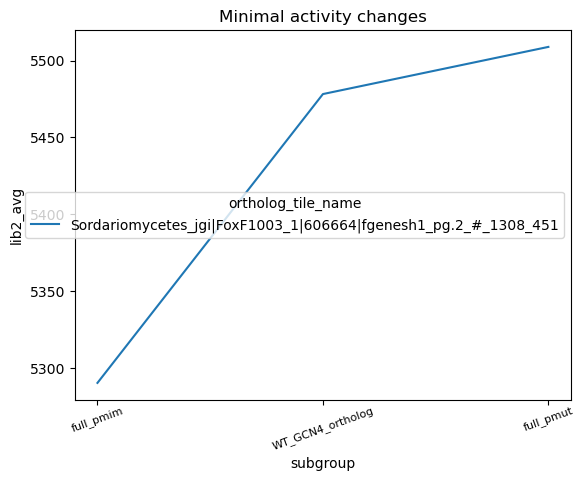

In [197]:
nochange = gcn4_values_fulmut[(abs(gcn4_values_fulmut['pmim-WT'])<500)&(abs(gcn4_values_fulmut['pmut-WT'])<500)]
sns.lineplot(x='subgroup', y='lib2_avg', hue='ortholog_tile_name',
             data=pd.melt(nochange, id_vars='ortholog_tile_name',
                          value_vars=['full_pmim', 'WT_GCN4_ortholog', 'full_pmut'], value_name='lib2_avg'),
         )
plt.tick_params('x', labelsize=8, bottom=True, labelrotation=20, pad=0)
plt.title('Minimal activity changes') 

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_d

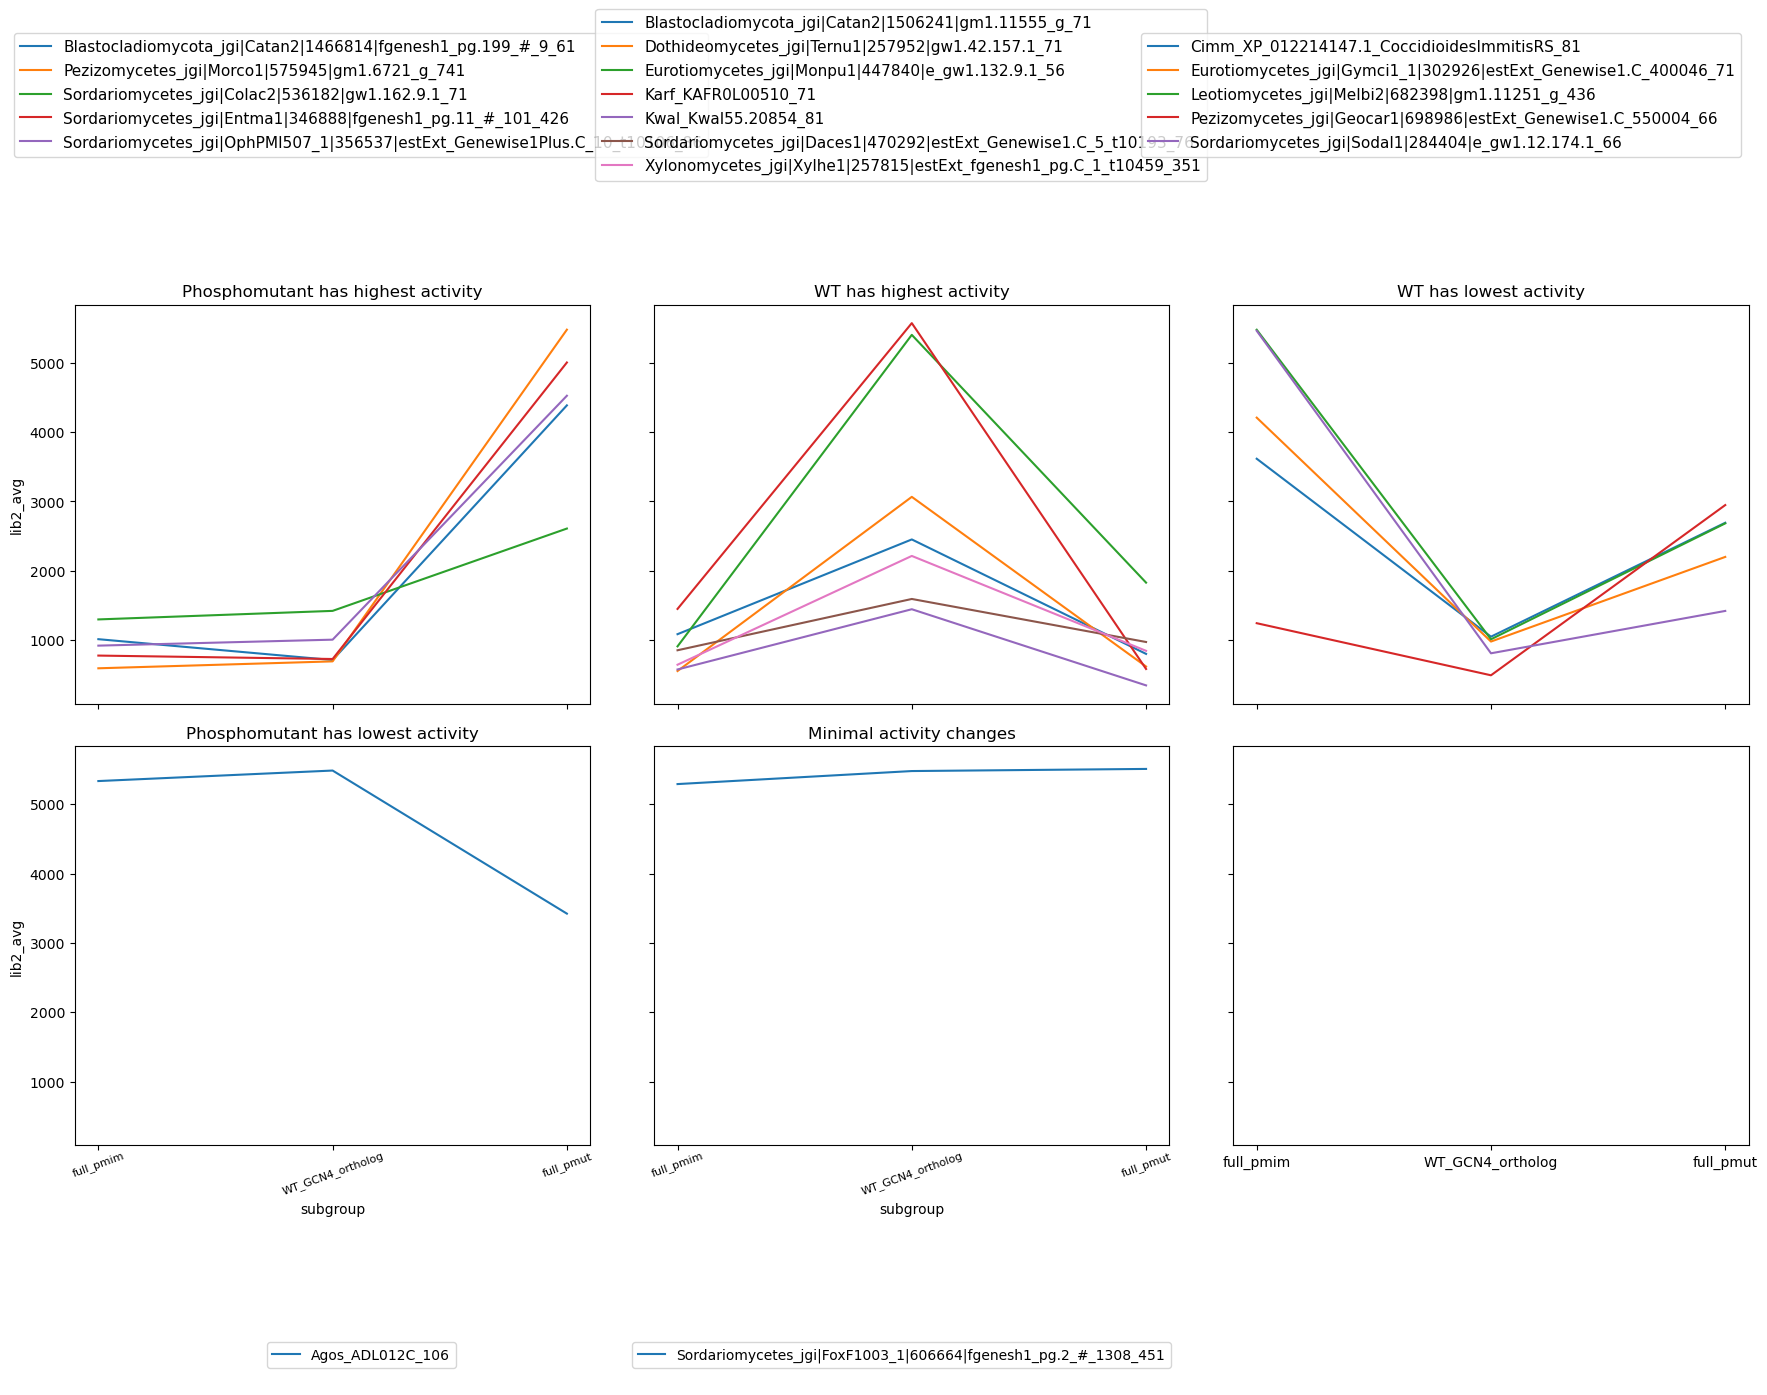

In [206]:
# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12), dpi=100, sharex=True, sharey=True)

# Adjust the layout to prevent overlap
fig.tight_layout(pad=3.0)

# Phosphomutant increases activity (Plot 1)
mimlow_muthigh = gcn4_values_fulmut[(abs(gcn4_values_fulmut['pmim-WT'])<500)&(gcn4_values_fulmut['pmut-WT']>500)]
sns.lineplot(x='subgroup', y='lib2_avg', hue='ortholog_tile_name',
             data=pd.melt(mimlow_muthigh, id_vars='ortholog_tile_name',
                          value_vars=['full_pmim', 'WT_GCN4_ortholog', 'full_pmut'], value_name='lib2_avg'),
             ax=axes[0, 0])
axes[0, 0].tick_params('x', labelsize=8, bottom=True, labelrotation=20, pad=0)
axes[0, 0].set_title('Phosphomutant has highest activity')

# WT has highest activity (Plot 2)
WThigh_plow = gcn4_values_fulmut[(gcn4_values_fulmut['pmim-WT']<-500)&(gcn4_values_fulmut['pmut-WT']<-500)]
sns.lineplot(x='subgroup', y='lib2_avg', hue='ortholog_tile_name',
             data=pd.melt(WThigh_plow, id_vars='ortholog_tile_name',
                          value_vars=['full_pmim', 'WT_GCN4_ortholog', 'full_pmut'], value_name='lib2_avg'),
             ax=axes[0, 1])
axes[0, 1].tick_params('x', labelsize=8, bottom=True, labelrotation=20, pad=0)
axes[0, 1].set_title('WT has highest activity')

# WT has lowest activity (Plot 3)
WTlow_phigh = gcn4_values_fulmut[(gcn4_values_fulmut['pmim-WT']>500)&(gcn4_values_fulmut['pmut-WT']>500)]
sns.lineplot(x='subgroup', y='lib2_avg', hue='ortholog_tile_name',
             data=pd.melt(WTlow_phigh, id_vars='ortholog_tile_name',
                          value_vars=['full_pmim', 'WT_GCN4_ortholog', 'full_pmut'], value_name='lib2_avg'),
             ax=axes[0, 2])
axes[0, 2].tick_params('x', labelsize=8, bottom=True, labelrotation=20, pad=0)
axes[0, 2].set_title('WT has lowest activity')

# Phosphomutant has lowest activity (Plot 4)
pmutlow = gcn4_values_fulmut[(abs(gcn4_values_fulmut['pmim-WT'])<500)&((gcn4_values_fulmut['pmut-WT'])<-500)]
sns.lineplot(x='subgroup', y='lib2_avg', hue='ortholog_tile_name',
             data=pd.melt(pmutlow, id_vars='ortholog_tile_name',
                          value_vars=['full_pmim', 'WT_GCN4_ortholog', 'full_pmut'], value_name='lib2_avg'),
             ax=axes[1, 0])
axes[1, 0].tick_params('x', labelsize=8, bottom=True, labelrotation=20, pad=0)
axes[1, 0].set_title('Phosphomutant has lowest activity')

# # Phosphomimetic has lowest activity (Plot 5)
# pmimlow = gcn4_values_fulmut[(gcn4_values_fulmut['pmim-WT']<-500)&(abs(gcn4_values_fulmut['pmut-WT'])<500)]
# sns.lineplot(x='subgroup', y='lib2_avg', hue='ortholog_tile_name',
#              data=pd.melt(pmimlow, id_vars='ortholog_tile_name',
#                           value_vars=['full_pmim', 'WT_GCN4_ortholog', 'full_pmut'], value_name='lib2_avg'),
#              ax=axes[1, 1])
# axes[1, 1].tick_params('x', labelsize=8, bottom=True, labelrotation=20, pad=0)
# axes[1, 1].set_title('Phosphomimetic has lowest activity')

# Minimal changes (Plot 5)
nochange = gcn4_values_fulmut[(abs(gcn4_values_fulmut['pmim-WT'])<500)&(abs(gcn4_values_fulmut['pmut-WT'])<500)]
sns.lineplot(x='subgroup', y='lib2_avg', hue='ortholog_tile_name',
             data=pd.melt(nochange, id_vars='ortholog_tile_name',
                          value_vars=['full_pmim', 'WT_GCN4_ortholog', 'full_pmut'], value_name='lib2_avg'),
             ax=axes[1, 1])
axes[1, 1].tick_params('x', labelsize=8, bottom=True, labelrotation=20, pad=0)
axes[1, 1].set_title('Minimal activity changes') 

# Remove legends from the subplots
for ax in axes.flat:
    try:
        ax.get_legend().remove()
    except:
        pass
# Extract handles and labels for each subplot
handles_labels = [ax.get_legend_handles_labels() for ax in axes.flat]

# Create separate axes for legends and place them above the top row and below the bottom row
# Legend for the top row
for i in range(3):
    legend_ax_top = fig.add_axes([0.1 + i * 0.3, 0.95, 0.2, 0.05])  # Custom position for each legend
    legend_ax_top.axis('off')  # Turn off the axis
    legend_ax_top.legend(*handles_labels[i], loc='center', fontsize=11)

# Legend for the bottom row
for i in range(2):
    legend_ax_bottom = fig.add_axes([0.1 + i * 0.3, -0.1, 0.2, 0.05])  # Custom position for each legend
    legend_ax_bottom.axis('off')  # Turn off the axis
    legend_ax_bottom.legend(*handles_labels[i + 3], loc='center', fontsize=10)

# Adjust layout for better spacing
plt.subplots_adjust(top=0.8, bottom=0.1, 
                    # left = 0.15, right = 0.85
                   )
plt.savefig('fullphosphositedynamics.svg')

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_d

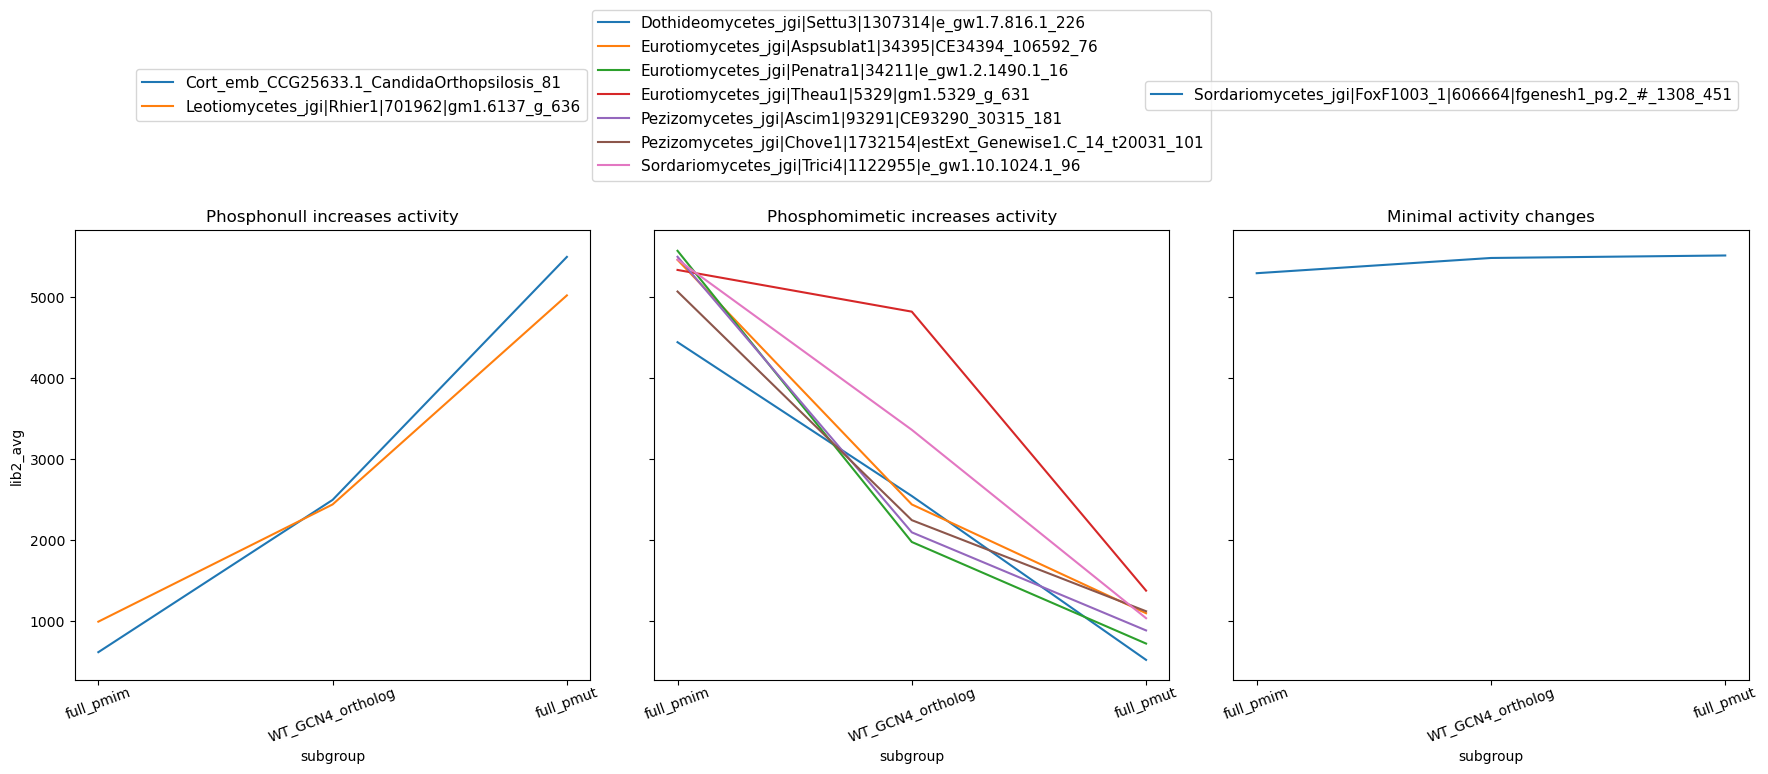

In [208]:
# Create a 2x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), dpi=100, sharex=True, sharey=True)

# Adjust the layout to prevent overlap
fig.tight_layout(pad=3.0)

# Phosphomutant increases activity, Phosphomimetic decreases (Plot 1)
mut_increase = gcn4_values_fulmut[(gcn4_values_fulmut['pmim-WT']<-500)&(gcn4_values_fulmut['pmut-WT']>500)]
sns.lineplot(x='subgroup', y='lib2_avg', hue='ortholog_tile_name',
             data=pd.melt(mut_increase, id_vars='ortholog_tile_name',
                          value_vars=['full_pmim', 'WT_GCN4_ortholog', 'full_pmut'], value_name='lib2_avg'),
             ax=axes[0])
axes[0].tick_params('x', labelsize=10, bottom=True, labelrotation=20, pad=0)
axes[0].set_title('Phosphonull increases activity')

# Phosphomimetic increases activity,  Phosphomutant decreases (Plot 2)
mim_increase = gcn4_values_fulmut[(gcn4_values_fulmut['pmim-WT']>500)&(gcn4_values_fulmut['pmut-WT']<-500)]
sns.lineplot(x='subgroup', y='lib2_avg', hue='ortholog_tile_name',
             data=pd.melt(mim_increase, id_vars='ortholog_tile_name',
                          value_vars=['full_pmim', 'WT_GCN4_ortholog', 'full_pmut'], value_name='lib2_avg'),
             ax=axes[1])
axes[1].tick_params('x', labelsize=10, bottom=True, labelrotation=20, pad=0)
axes[1].set_title('Phosphomimetic increases activity')

# Minimal changes (Plot 6)
nochange = gcn4_values_fulmut[(abs(gcn4_values_fulmut['pmim-WT'])<500)&(abs(gcn4_values_fulmut['pmut-WT'])<500)]
sns.lineplot(x='subgroup', y='lib2_avg', hue='ortholog_tile_name',
             data=pd.melt(nochange, id_vars='ortholog_tile_name',
                          value_vars=['full_pmim', 'WT_GCN4_ortholog', 'full_pmut'], value_name='lib2_avg'),
             ax=axes[2])
axes[2].tick_params('x', labelsize=10, bottom=True, labelrotation=20, pad=0)
axes[2].set_title('Minimal activity changes')


# Remove legends from the subplots
for ax in axes.flat:
    ax.get_legend().remove()
    
# Extract handles and labels for each subplot
handles_labels = [ax.get_legend_handles_labels() for ax in axes.flat]

# Create separate axes for legends and place them above the top row and below the bottom row
# Legend for the top row
for i in range(3):
    legend_ax_top = fig.add_axes([0.1 + i * 0.3, 0.95, 0.2, 0.05])  # Custom position for each legend
    legend_ax_top.axis('off')  # Turn off the axis
    legend_ax_top.legend(*handles_labels[i], loc='center', fontsize=11)

# Adjust layout for better spacing
plt.subplots_adjust(top=0.75, bottom=0.0, 
                    # left = 0.15, right = 0.85
                   )
plt.savefig('fullphosphositedynamics_small.svg')

In [209]:
# gcn4_values_fulmut.to_csv('fullphosphositedynamics.csv')

## Do full phosphosite mutations behave differentfly than single mutation?

In [210]:
gcn4_values_pmut = gcn4_values.copy(deep=True)
gcn4_values_pmut = gcn4_values_pmut.reset_index()
gcn4_values_pmut = gcn4_values_pmut[['WT_GCN4_ortholog','full_pmut','single_pmut_site_1','single_pmut_site_2','single_pmut_site_3','ortholog_tile_name']]
gcn4_values_pmut = gcn4_values_pmut[gcn4_values_pmut['single_pmut_site_1'].notna()]
gcn4_values_pmut['pmut-WT'] = gcn4_values_pmut['full_pmut'] - gcn4_values_pmut['WT_GCN4_ortholog']
gcn4_values_pmut

subgroup  WT_GCN4_ortholog    full_pmut  single_pmut_site_1  \
1               712.155074  4384.591121          643.296732   
2              2451.305221   800.706411         2938.427288   
3              1048.825426  2691.868560         1050.116899   
7                      NaN  5590.853436         3037.144320   
8              1726.675538          NaN         1003.919596   
9              4410.667909          NaN          958.558735   
10                     NaN  1188.958598          933.523419   
11             2542.444474   521.324174         2542.852353   
15             2438.481565  1096.720151         2199.549427   
17              978.461660  2199.180171         2197.379812   
18             5401.627051  1828.265070         1188.778675   
19             1975.559342   722.575237         5427.226506   
20             4816.173006  1375.287220         1315.750925   
26                     NaN          NaN         5418.760946   
27                     NaN          NaN         1663.372247   
29             5262.050904          NaN         5308.649068   
33             2094.378559   884.722271          890.967462   
34              509.497112  5526.626423         1936.549110   
35             2244.610369  1121.180952         1667.763610   
36              491.947096  2947.041404         5539.161529   
37              692.610746  5476.640612          851.952011   
38                     NaN  5621.096246         1414.584066   
39              816.499152          NaN         5132.406094   
42             1059.615099          NaN          826.687425   
44             1592.713042   972.163341         4308.202890   
45              726.967560  5003.061516         1008.950745   
46             5478.199479  5508.878150         5507.488995   
49             1211.125595   950.917818         5531.287892   
50             1005.823886  4523.674646         1047.019465   
51              809.123100  1420.141378         2550.990217   
52             3358.839805  1035.556292         5215.332555   
56             2213.302968   844.856782          884.347389   

subgroup  single_pmut_site_2  single_pmut_site_3  \
1                 744.275910          823.384431   
2                3626.448481         1079.394536   
3                1725.963931                 NaN   
7                        NaN                 NaN   
8                 998.749406                 NaN   
9                        NaN                 NaN   
10                       NaN                 NaN   
11                       NaN                 NaN   
15               4833.154730                 NaN   
17                994.057017                 NaN   
18               5037.066550          592.443542   
19                875.198898          740.050409   
20               4439.583362                 NaN   
26               3615.347398                 NaN   
27               2485.761668                 NaN   
29               1130.450402                 NaN   
33               5023.028618          544.989060   
34                434.407242                 NaN   
35               2358.009658                 NaN   
36               5278.294251                 NaN   
37               5369.709520                 NaN   
38                614.450283         5434.100247   
39                434.516897                 NaN   
42               1008.482982                 NaN   
44               1481.734833                 NaN   
45               1113.331281                 NaN   
46               4673.697300                 NaN   
49               1105.420502         1369.165716   
50                845.208171                 NaN   
51               1670.100076                 NaN   
52               5468.865998                 NaN   
56               1747.474949                 NaN   

subgroup                                 ortholog_tile_name      pmut-WT  
1         Blastocladiomycota_jgi|Catan2|1466814|fgenesh1...  3672.436047  
2         Blastocladiomycota_jgi|Catan2|1506241|gm1.1

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_d

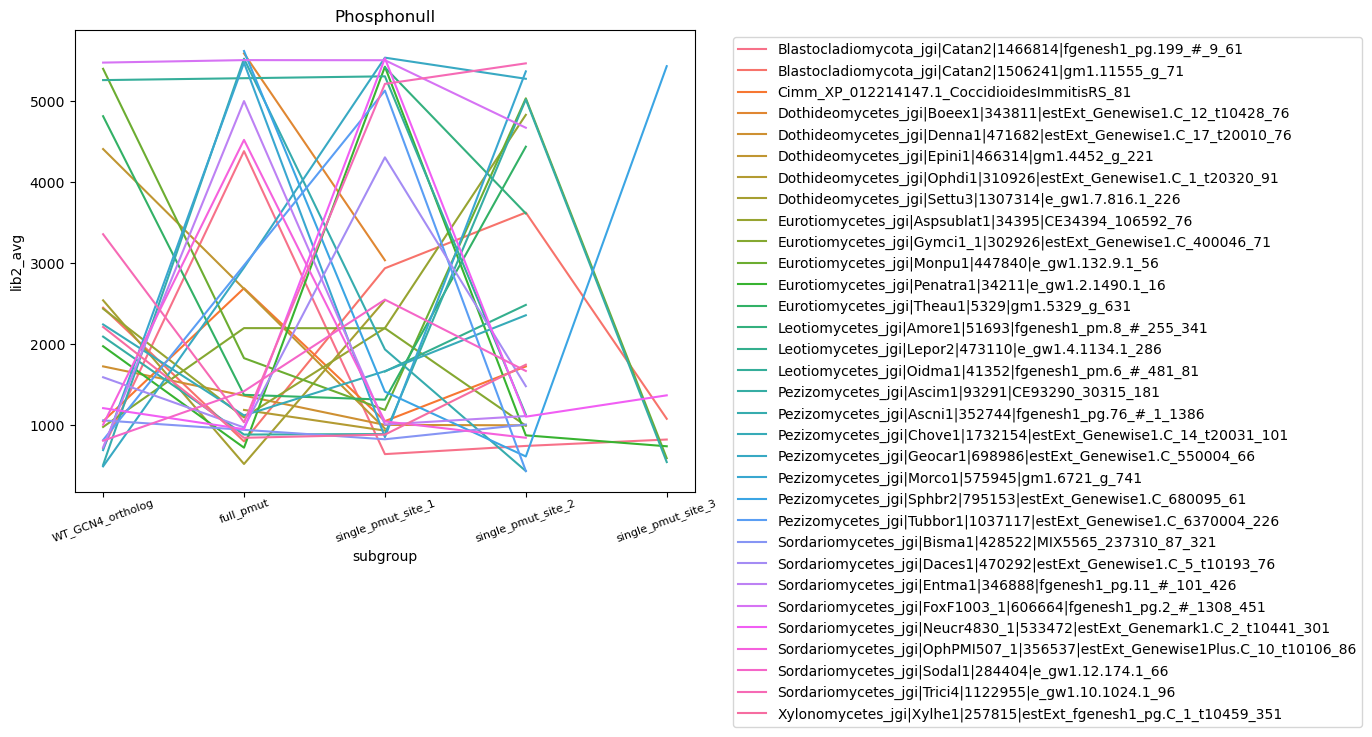

In [211]:

fig, axes = plt.subplots(1,1, figsize=(8, 6), dpi = 100)

sns.lineplot(x = 'subgroup', y = 'lib2_avg',hue = 'ortholog_tile_name', 
             data=pd.melt(gcn4_values_pmut, id_vars='ortholog_tile_name',
                          value_vars=['WT_GCN4_ortholog','full_pmut','single_pmut_site_1','single_pmut_site_2','single_pmut_site_3',], 
                          value_name='lib2_avg'), 
             legend = True)
axes.tick_params('x', labelsize = 8, bottom = True, labelrotation = 20, pad = 0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Phosphonull')
plt.savefig('phosphonulldynamics.svg')

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_d

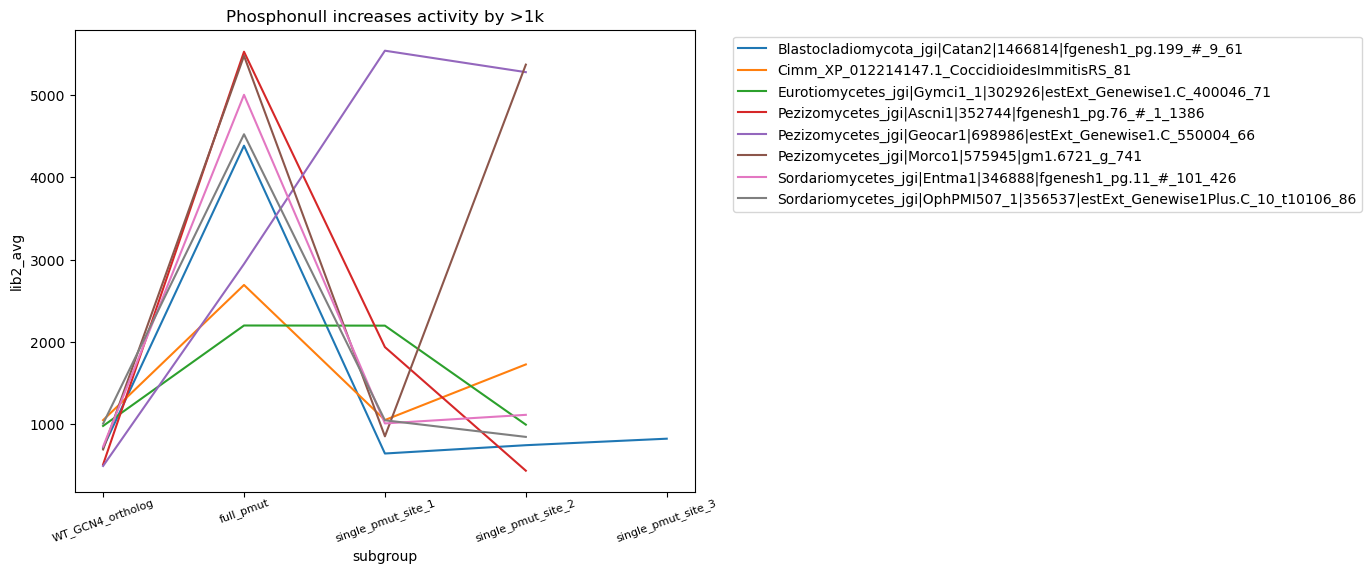

In [212]:
fullpmut_inc = gcn4_values_pmut[gcn4_values_pmut['pmut-WT']>1000]
fig, axes = plt.subplots(1,1, figsize=(8, 6), dpi = 100)

sns.lineplot(x = 'subgroup', y = 'lib2_avg',hue = 'ortholog_tile_name', 
             data=pd.melt(fullpmut_inc, id_vars='ortholog_tile_name',
                          value_vars=['WT_GCN4_ortholog','full_pmut','single_pmut_site_1','single_pmut_site_2','single_pmut_site_3',], 
                          value_name='lib2_avg'), 
             legend = True)
axes.tick_params('x', labelsize = 8, bottom = True, labelrotation = 20, pad = 0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Phosphonull increases activity by >1k')
plt.savefig('phophonull_inc.svg')

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_d

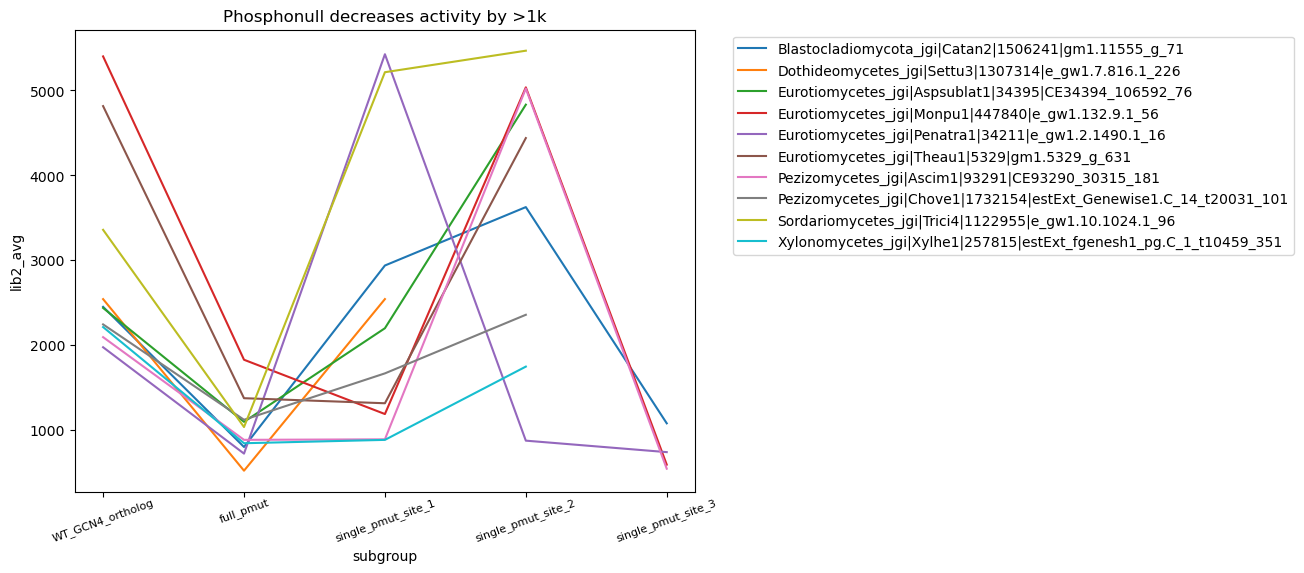

In [213]:
fullpmut_dec = gcn4_values_pmut[gcn4_values_pmut['pmut-WT']<-1000]
fig, axes = plt.subplots(1,1, figsize=(8, 6), dpi = 100)

sns.lineplot(x = 'subgroup', y = 'lib2_avg',hue = 'ortholog_tile_name', 
             data=pd.melt(fullpmut_dec, id_vars='ortholog_tile_name',
                          value_vars=['WT_GCN4_ortholog','full_pmut','single_pmut_site_1','single_pmut_site_2','single_pmut_site_3',], 
                          value_name='lib2_avg'), 
             legend = True)
axes.tick_params('x', labelsize = 8, bottom = True, labelrotation = 20, pad = 0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Phosphonull decreases activity by >1k')
plt.savefig('phophonull_dec.svg')

In [163]:
gcn4_values.head()

subgroup                                            WT_GCN4_ortholog  \
ortholog_tile_name                                                     
Agos_ADL012C_106                                         5485.522907   
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...        712.155074   
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555...       2451.305221   
Cimm_XP_012214147.1_CoccidioidesImmitisRS_81             1048.825426   
Cmal_EMG49335.1_CandidaMaltosaXu316_76                   1523.140618   

subgroup                                              full_pmim    full_pmut  \
ortholog_tile_name                                                             
Agos_ADL012C_106                                    5333.885501  3421.959793   
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...  1012.699035  4384.591121   
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555...  1084.830883   800.706411   
Cimm_XP_012214147.1_CoccidioidesImmitisRS_81        3615.131855  2691.868560   
Cmal_EMG49335.1_CandidaMaltosaXu316_76              1144.509777  5521.473299   

subgroup                                            single_pmim_site_1  \
ortholog_tile_name                                                       
Agos_ADL012C_106                                                   NaN   
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...         4403.201555   
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555...         3508.534686   
Cimm_XP_012214147.1_CoccidioidesImmitisRS_81               4534.842819   
Cmal_EMG49335.1_CandidaMaltosaXu316_76                             NaN   

subgroup                                            single_pmim_site_2  \
ortholog_tile_name                                                       
Agos_ADL012C_106                                                   NaN   
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...          636.233499   
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555...          926.196589   
Cimm_XP_012214147.1_CoccidioidesImmitisRS_81               1235.784532   
Cmal_EMG49335.1_CandidaMaltosaXu316_76                             NaN   

subgroup                                            single_pmim_site_3  \
ortholog_tile_name                                                       
Agos_ADL012C_106                                                   NaN   
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...         1213.633107   
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555...          727.066450   
Cimm_XP_012214147.1_CoccidioidesImmitisRS_81                       NaN   
Cmal_EMG49335.1_CandidaMaltosaXu316_76                             NaN   

subgroup                                            single_pmut_site_1  \
ortholog_tile_name                                                       
Agos_ADL012C_106                                                   NaN   
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...          643.296732   
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555...         2938.427288   
Cimm_XP_012214147.1_CoccidioidesImmitisRS_81               1050.116899   
Cmal_EMG49335.1_CandidaMaltosaXu316_76                             NaN   

subgroup                                            single_pmut_site_2  \
ortholog_tile_name                                                       
Agos_ADL012C_106                                                   NaN   
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...          744.275910   
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555...         3626.448481   
Cimm_XP_012214147.1_CoccidioidesImmitisRS_81               1725.963931   
Cmal_EMG49335.1_CandidaMaltosaXu316_76                             NaN   

subgroup                                            single_pmut_site_3  
ortholog_tile_name                                                      
Agos_ADL012C_106                                                   NaN  
Blastocladiomycota_jgi|Catan2|1466814|fgenesh1_...          823.384431  
Blastocladiomycota_jgi|Catan2|1506241|gm1.11555

In [214]:
gcn4_values_pmim = gcn4_values.copy(deep=True)
gcn4_values_pmim = gcn4_values_pmim.reset_index()
gcn4_values_pmim = gcn4_values_pmim[['WT_GCN4_ortholog','full_pmim','single_pmim_site_1','single_pmim_site_2','single_pmim_site_3','ortholog_tile_name']]
gcn4_values_pmim = gcn4_values_pmim[gcn4_values_pmim['single_pmim_site_1'].notna()]
gcn4_values_pmim['pmim-WT'] = gcn4_values_pmim['full_pmim'] - gcn4_values_pmim['WT_GCN4_ortholog']
gcn4_values_pmim

subgroup  WT_GCN4_ortholog    full_pmim  single_pmim_site_1  \
1               712.155074  1012.699035         4403.201555   
2              2451.305221  1084.830883         3508.534686   
3              1048.825426  3615.131855         4534.842819   
7                      NaN          NaN         5567.579703   
8              1726.675538   845.067820          801.297258   
11             2542.444474  4439.520411          521.588086   
12             3065.411765   553.345392          915.175446   
15             2438.481565  5454.822129          872.987173   
16             5476.897656  3789.327602         1749.189428   
17              978.461660  4207.860345         1385.151291   
18             5401.627051   909.122771         5252.973606   
19             1975.559342  5566.731502         5118.023047   
20             4816.173006  5330.586959         1083.195557   
27                     NaN  5565.608285         5416.073820   
29             5262.050904          NaN         2313.083874   
33             2094.378559  5492.952826         1398.966388   
36              491.947096  1243.227260         1188.407630   
38                     NaN  1781.568281         5410.273243   
40                     NaN   963.729702          768.503794   
42             1059.615099          NaN          469.408270   
44             1592.713042   852.973151         1045.039372   
45              726.967560   776.303842         5563.462205   
46             5478.199479  5290.352365         1654.141878   
47                     NaN          NaN         3592.259118   
48             1496.131725          NaN          837.240458   
49             1211.125595  5458.784285          889.479923   
50             1005.823886   919.666409          579.864174   
51              809.123100  5460.030188         5360.662200   
52             3358.839805  5458.661819         3722.472515   
53              792.598706  1406.082160         4743.064261   
54             1966.201762          NaN          454.839799   
56             2213.302968   644.501645         3992.623735   

subgroup  single_pmim_site_2  single_pmim_site_3  \
1                 636.233499         1213.633107   
2                 926.196589          727.066450   
3                1235.784532                 NaN   
7                        NaN                 NaN   
8                 835.212124                 NaN   
11                594.946043                 NaN   
12               1513.356521         4293.719386   
15                940.260699                 NaN   
16               4987.773197                 NaN   
17                       NaN                 NaN   
18               1232.667823         2620.875045   
19               1165.491671         4966.376366   
20               3651.709742                 NaN   
27               5454.684843                 NaN   
29                       NaN                 NaN   
33               2576.685206          952.301052   
36               5484.038493                 NaN   
38                       NaN                 NaN   
40               1004.841218         5315.761586   
42                       NaN                 NaN   
44               1056.546212                 NaN   
45                812.676144                 NaN   
46               2018.650039                 NaN   
47                737.151831                 NaN   
48                       NaN                 NaN   
49               1362.045948         5236.798417   
50               1427.560749                 NaN   
51                       NaN                 NaN   
52               3139.118436                 NaN   
53                339.417252                 NaN   
54                831.213337                 NaN   
56               1316.119833                 NaN   

subgroup                                 ortholog_tile_name      pmim-WT  
1         Blastocladiomycota_jgi|Catan2|1466814|fgenesh1...   300.543962  
2         Blastocladiomycota_jgi|Catan2|1506241|gm1.1

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_d

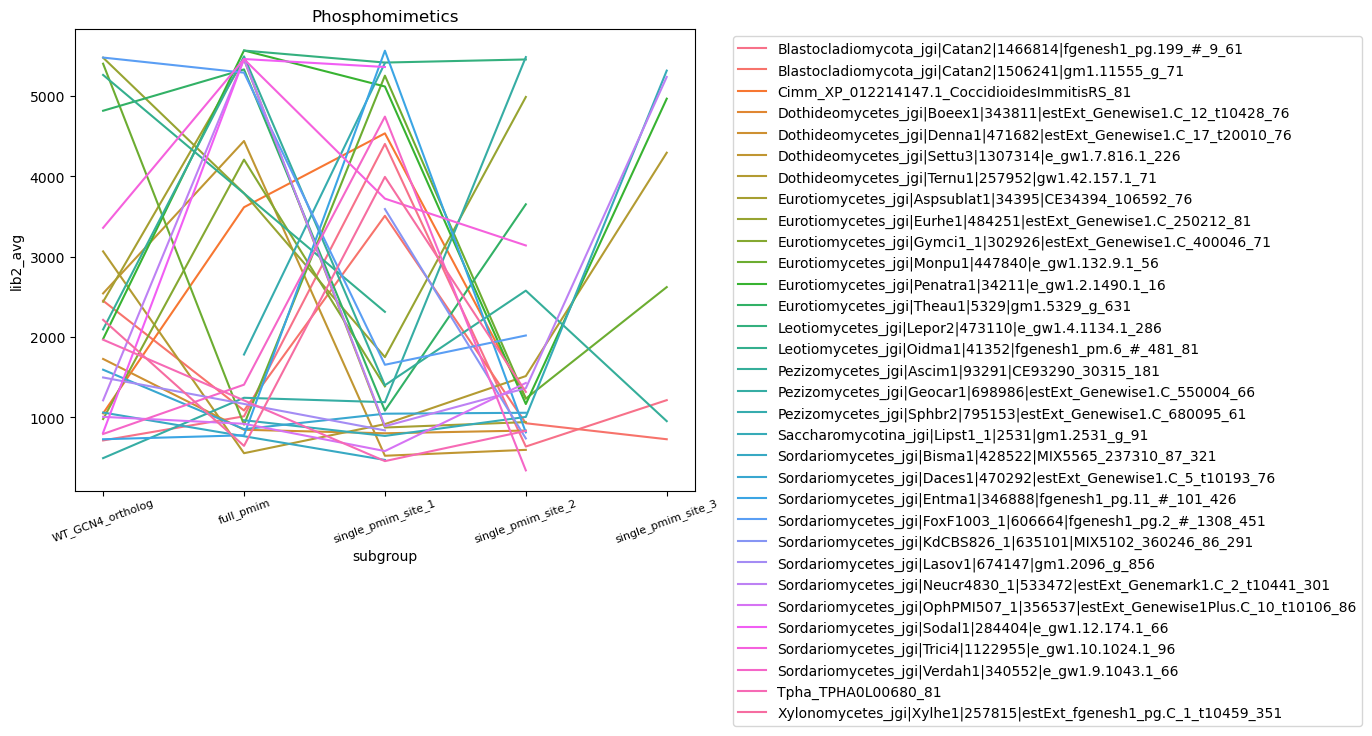

In [215]:

fig, axes = plt.subplots(1,1, figsize=(8, 6), dpi = 100)

sns.lineplot(x = 'subgroup', y = 'lib2_avg',hue = 'ortholog_tile_name', 
             data=pd.melt(gcn4_values_pmim, id_vars='ortholog_tile_name',
                          value_vars=['WT_GCN4_ortholog','full_pmim','single_pmim_site_1','single_pmim_site_2','single_pmim_site_3'], 
                          value_name='lib2_avg'), 
             legend = True)
axes.tick_params('x', labelsize = 8, bottom = True, labelrotation = 20, pad = 0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Phosphomimetics')
plt.savefig('phosphomimeticdynamics.svg')

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_d

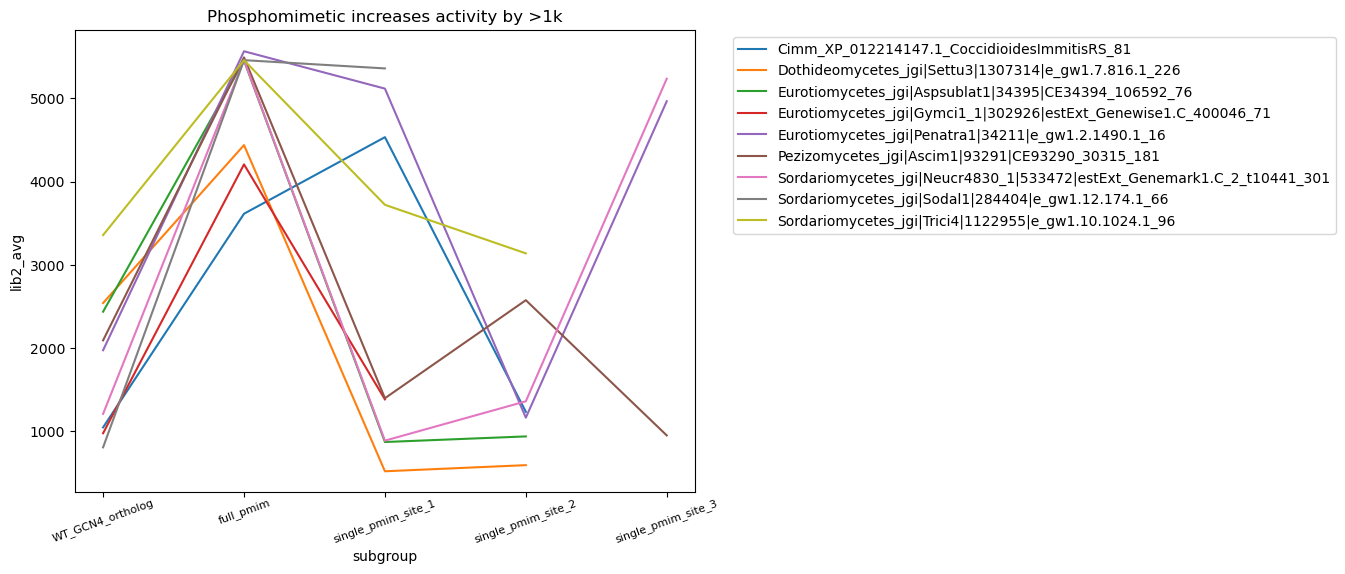

In [216]:
fullpmim_inc = gcn4_values_pmim[gcn4_values_pmim['pmim-WT']>1000]
fig, axes = plt.subplots(1,1, figsize=(8, 6), dpi = 100)

sns.lineplot(x = 'subgroup', y = 'lib2_avg',hue = 'ortholog_tile_name', 
             data=pd.melt(fullpmim_inc, id_vars='ortholog_tile_name',
                          value_vars=['WT_GCN4_ortholog','full_pmim','single_pmim_site_1','single_pmim_site_2','single_pmim_site_3'], 
                          value_name='lib2_avg'), 
             legend = True)
axes.tick_params('x', labelsize = 8, bottom = True, labelrotation = 20, pad = 0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Phosphomimetic increases activity by >1k')
plt.savefig('phosphomimetic_inc.svg')

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_d

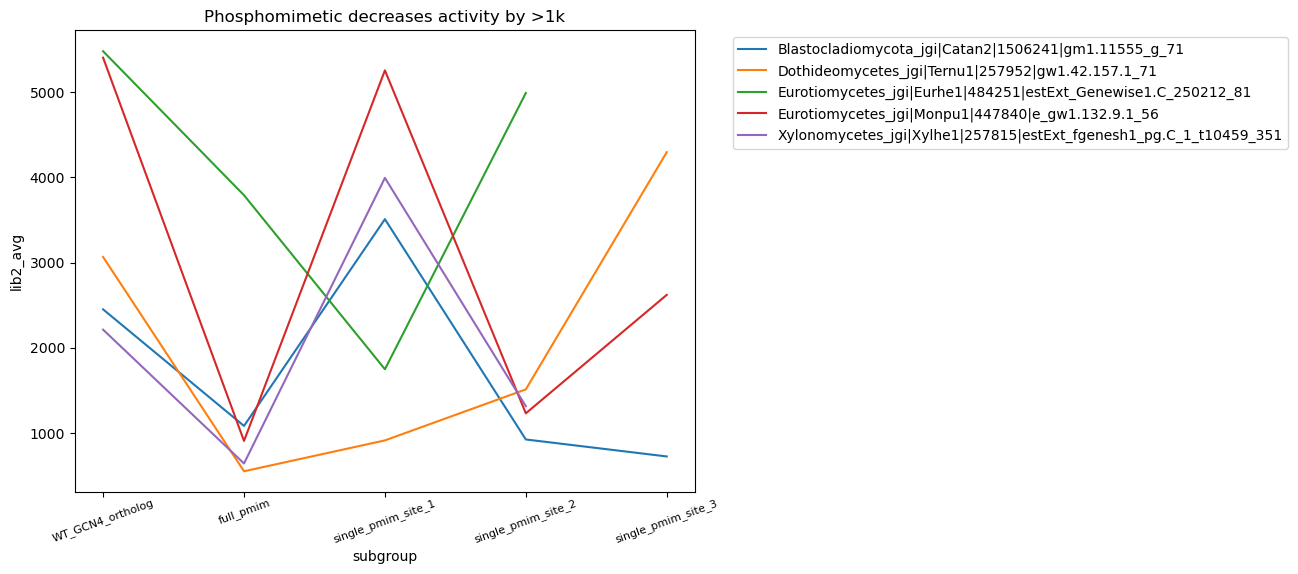

In [217]:
fullpmim_dec = gcn4_values_pmim[gcn4_values_pmim['pmim-WT']<-1000]
fig, axes = plt.subplots(1,1, figsize=(8, 6), dpi = 100)

sns.lineplot(x = 'subgroup', y = 'lib2_avg',hue = 'ortholog_tile_name', 
             data=pd.melt(fullpmim_dec, id_vars='ortholog_tile_name',
                          value_vars=['WT_GCN4_ortholog','full_pmim','single_pmim_site_1','single_pmim_site_2','single_pmim_site_3'], 
                          value_name='lib2_avg'), 
             legend = True)
axes.tick_params('x', labelsize = 8, bottom = True, labelrotation = 20, pad = 0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Phosphomimetic decreases activity by >1k')
plt.savefig('phosphomimetic_dec.svg')

In [218]:
# gcn4_values_pmut.to_csv('phosphonulldynamics.csv')

In [220]:
# gcn4_values_pmim.to_csv('phosphomimeticdynamics.csv')

## Move all of this analysis into a folder to copy to local (to_local/)

First iteration I forgot to impose threshold on gcn4_values --> these files went to oct11_to_local
Second iteration I imposed 100 read per sort threshold --> oct11_to_local_thresh